Student ID: 16577                                                                                           
Title : Predicting IFC Investment Amounts and Environmental Impact Categories Using Machine Learning Techniques

1. Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from datetime import datetime

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [7]:
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)

In [8]:
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

2. Load Dataset

In [11]:
df = pd.read_csv("C:/Users/admin/Desktop/Hybrid_ML/Dataset/ifc_investment_services_projects.csv")
df.head()

,Date Disclosed,Project Name,Document Type,Project Number,Product Line,Company Name,Country,IFC Country Code,Industry,Environmental Category,Department,Status,Projected Board Date,IFC investment for Risk Management(Million - USD),IFC investment for Guarantee(Million - USD),IFC investment for Loan(Million - USD),IFC investment for Equity(Million - USD),Total IFC investment as approved by Board(Million - USD),WB Country Code,As of Date,IFC Approval Date,IFC Invested Date,IFC Signed Date,Project Url
0,03/30/2023,BOP EU Tchad,Summary of Investment Information (AIP Policy ...,45483,Loan,EXPRESS UNION TCHAD,Chad,CHD,Financial Markets,FI-3 - No Impact,Regional Industry - FIG Africa,Active,05/01/2023,NaN,NaN,1.03,NaN,1.03,TD,12/04/2025,06/12/2023,07/17/2024,06/26/2023,https://disclosures.ifc.org/project-detail/SII...
1,12/04/2014,Millicom Tchad SA,Summary of Investment Information (AIP Policy ...,34297,Loan,MOOV AFRICA TCHAD SA,Chad,CHD,Telecommunications and Technology,B - Limited,"TMT, Venture Capital &amp; Funds",Completed,05/27/2014,NaN,NaN,76.06,NaN,76.06,TD,12/04/2025,05/30/2014,08/22/2014,06/06/2014,https://disclosures.ifc.org/project-detail/SII...
2,04/30/2013,Chad Clinic,Summary of Investment Information (AIP Policy ...,32607,Loan,CLINIQUE PROVIDENCE,Chad,CHD,"Health, Education and Life Sciences",B - Limited,Regional Industry - MAS Africa,Active,05/30/2013,NaN,NaN,1.38,NaN,1.38,TD,12/04/2025,05/06/2015,12/30/2015,05/27/2015,https://disclosures.ifc.org/project-detail/SII...
3,04/19/2010,Aubaine Graphic SA Printing Chad,Summary of Proposed Investment (Disclosure Pol...,29084,Loan,Imprimerie Aubaine Graphic,Chad,CHD,Agribusiness and Forestry,B - Limited,Regional Industry - MAS Africa,Completed,05/20/2010,NaN,NaN,2.83,NaN,2.83,TD,12/04/2025,06/28/2010,02/22/2012,06/30/2010,https://disclosures.ifc.org/project-detail/SPI...
4,03/04/2010,Ecobank Chad,Summary of Proposed Investment (Disclosure Pol...,29317,Loan,ECOBANK TCHAD SA,Chad,CHD,Financial Markets,FI,Banking and Capital Markets,Completed,04/05/2010,NaN,NaN,3.08,NaN,3.08,TD,12/04/2025,04/29/2010,03/01/2011,06/29/2010,https://disclosures.ifc.org/project-detail/SPI...


In [13]:
# Shape of dataset
df.shape

# Dataset info
df.info()

# Preview summary statistics
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6777 entries, 0 to 6776
Data columns (total 24 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Date Disclosed                                            6777 non-null   object 
 1   Project Name                                              6777 non-null   object 
 2   Document Type                                             6777 non-null   object 
 3   Project Number                                            6777 non-null   int64  
 4   Product Line                                              6497 non-null   object 
 5   Company Name                                              6754 non-null   object 
 6   Country                                                   6777 non-null   object 
 7   IFC Country Code                                          5956 non-null   object 
 8   Industry          

,Date Disclosed,Project Name,Document Type,Project Number,Product Line,Company Name,Country,IFC Country Code,Industry,Environmental Category,Department,Status,Projected Board Date,IFC investment for Risk Management(Million - USD),IFC investment for Guarantee(Million - USD),IFC investment for Loan(Million - USD),IFC investment for Equity(Million - USD),Total IFC investment as approved by Board(Million - USD),WB Country Code,As of Date,IFC Approval Date,IFC Invested Date,IFC Signed Date,Project Url
count,6777,6777,6777,6777.000000,6497,6754,6777,5956,6777,6777,6777,6777,5885,202.000000,400.000000,4806.000000,2308.00000,6498.000000,6442,6777,6529,6022,6289,6777
unique,4090,6760,2,NaN,4,5134,170,121,10,8,141,6,3250,NaN,NaN,NaN,NaN,NaN,152,1,3443,3906,3688,6777
top,02/05/2010,Nanjing City Commercial Bank,Summary of Investment Information (AIP Policy ...,NaN,Loan,INTERNATIONAL FINANCE CORPORATION,India,IND,Financial Markets,B - Limited,"Global Industry, Financial Markets",Completed,12/22/2023,NaN,NaN,NaN,NaN,NaN,IN,12/04/2025,11/11/2004,12/20/2012,06/30/2022,https://disclosures.ifc.org/project-detail/SII...
freq,12,2,3491,NaN,4453,20,532,532,2565,3037,889,4113,14,NaN,NaN,NaN,NaN,NaN,532,6777,56,8,31,1
mean,NaN,NaN,NaN,34732.320201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.553713,168.177350,50.324370,23.44078,56.071568,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,43526.017163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.631027,316.049388,110.644166,43.19616,132.516219,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,3402.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.00000,0.020000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,24398.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,8.560000,10.000000,3.05000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,32258.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.500000,30.000000,25.000000,10.00000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,42773.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.210000,100.000000,55.842500,25.00000,54.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
date_cols = ['Date Disclosed', 'Projected Board Date', 'IFC Approval Date',
             'IFC Signed Date', 'IFC Invested Date', 'As of Date']

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')


In [15]:
df.describe(include='all')

C:\Users\admin\AppData\Local\Temp\ipykernel_22432\2884002236.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')
C:\Users\admin\AppData\Local\Temp\ipykernel_22432\2884002236.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')
C:\Users\admin\AppData\Local\Temp\ipykernel_22432\2884002236.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.


,Date Disclosed,Project Name,Document Type,Project Number,Product Line,Company Name,Country,IFC Country Code,Industry,Environmental Category,Department,Status,Projected Board Date,IFC investment for Risk Management(Million - USD),IFC investment for Guarantee(Million - USD),IFC investment for Loan(Million - USD),IFC investment for Equity(Million - USD),Total IFC investment as approved by Board(Million - USD),WB Country Code,As of Date,IFC Approval Date,IFC Invested Date,IFC Signed Date,Project Url
count,6777,6777,6777,6777.000000,6497,6754,6777,5956,6777,6777,6777,6777,5885,202.000000,400.000000,4806.000000,2308.00000,6498.000000,6442,6777,6529,6022,6289,6777
unique,4090,6760,2,NaN,4,5134,170,121,10,8,141,6,3250,NaN,NaN,NaN,NaN,NaN,152,1,3443,3906,3688,6777
top,2010-02-05 00:00:00,Nanjing City Commercial Bank,Summary of Investment Information (AIP Policy ...,NaN,Loan,INTERNATIONAL FINANCE CORPORATION,India,IND,Financial Markets,B - Limited,"Global Industry, Financial Markets",Completed,2023-12-22 00:00:00,NaN,NaN,NaN,NaN,NaN,IN,2025-12-04 00:00:00,2004-11-11 00:00:00,2012-12-20 00:00:00,2022-06-30 00:00:00,https://disclosures.ifc.org/project-detail/SII...
freq,12,2,3491,NaN,4453,20,532,532,2565,3037,889,4113,14,NaN,NaN,NaN,NaN,NaN,532,6777,56,8,31,1
first,1994-10-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994-11-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2025-12-04 00:00:00,1993-11-01 00:00:00,1994-01-28 00:00:00,1993-06-24 00:00:00,NaN
last,2025-12-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2026-04-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2025-12-04 00:00:00,2025-11-26 00:00:00,2025-11-27 00:00:00,2025-11-28 00:00:00,NaN
mean,NaN,NaN,NaN,34732.320201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.553713,168.177350,50.324370,23.44078,56.071568,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,43526.017163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.631027,316.049388,110.644166,43.19616,132.516219,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,3402.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.00000,0.020000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,24398.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,8.560000,10.000000,3.05000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.head()

,Date Disclosed,Project Name,Document Type,Project Number,Product Line,Company Name,Country,IFC Country Code,Industry,Environmental Category,Department,Status,Projected Board Date,IFC investment for Risk Management(Million - USD),IFC investment for Guarantee(Million - USD),IFC investment for Loan(Million - USD),IFC investment for Equity(Million - USD),Total IFC investment as approved by Board(Million - USD),WB Country Code,As of Date,IFC Approval Date,IFC Invested Date,IFC Signed Date,Project Url
0,2023-03-30,BOP EU Tchad,Summary of Investment Information (AIP Policy ...,45483,Loan,EXPRESS UNION TCHAD,Chad,CHD,Financial Markets,FI-3 - No Impact,Regional Industry - FIG Africa,Active,2023-05-01,NaN,NaN,1.03,NaN,1.03,TD,2025-12-04,2023-06-12,2024-07-17,2023-06-26,https://disclosures.ifc.org/project-detail/SII...
1,2014-12-04,Millicom Tchad SA,Summary of Investment Information (AIP Policy ...,34297,Loan,MOOV AFRICA TCHAD SA,Chad,CHD,Telecommunications and Technology,B - Limited,"TMT, Venture Capital &amp; Funds",Completed,2014-05-27,NaN,NaN,76.06,NaN,76.06,TD,2025-12-04,2014-05-30,2014-08-22,2014-06-06,https://disclosures.ifc.org/project-detail/SII...
2,2013-04-30,Chad Clinic,Summary of Investment Information (AIP Policy ...,32607,Loan,CLINIQUE PROVIDENCE,Chad,CHD,"Health, Education and Life Sciences",B - Limited,Regional Industry - MAS Africa,Active,2013-05-30,NaN,NaN,1.38,NaN,1.38,TD,2025-12-04,2015-05-06,2015-12-30,2015-05-27,https://disclosures.ifc.org/project-detail/SII...
3,2010-04-19,Aubaine Graphic SA Printing Chad,Summary of Proposed Investment (Disclosure Pol...,29084,Loan,Imprimerie Aubaine Graphic,Chad,CHD,Agribusiness and Forestry,B - Limited,Regional Industry - MAS Africa,Completed,2010-05-20,NaN,NaN,2.83,NaN,2.83,TD,2025-12-04,2010-06-28,2012-02-22,2010-06-30,https://disclosures.ifc.org/project-detail/SPI...
4,2010-03-04,Ecobank Chad,Summary of Proposed Investment (Disclosure Pol...,29317,Loan,ECOBANK TCHAD SA,Chad,CHD,Financial Markets,FI,Banking and Capital Markets,Completed,2010-04-05,NaN,NaN,3.08,NaN,3.08,TD,2025-12-04,2010-04-29,2011-03-01,2010-06-29,https://disclosures.ifc.org/project-detail/SPI...


In [17]:
df.describe()


,Project Number,IFC investment for Risk Management(Million - USD),IFC investment for Guarantee(Million - USD),IFC investment for Loan(Million - USD),IFC investment for Equity(Million - USD),Total IFC investment as approved by Board(Million - USD)
count,6777.000000,202.000000,400.000000,4806.000000,2308.00000,6498.000000
mean,34732.320201,5.553713,168.177350,50.324370,23.44078,56.071568
std,43526.017163,11.631027,316.049388,110.644166,43.19616,132.516219
min,3402.000000,0.000000,0.000000,0.000000,0.00000,0.020000
25%,24398.000000,1.000000,8.560000,10.000000,3.05000,10.000000
50%,32258.000000,2.500000,30.000000,25.000000,10.00000,25.000000
75%,42773.000000,5.210000,100.000000,55.842500,25.00000,54.000000
max,574447.000000,100.000000,1500.000000,3115.000000,1003.00000,3115.000000


In [18]:
df.describe(include='object')


,Project Name,Document Type,Product Line,Company Name,Country,IFC Country Code,Industry,Environmental Category,Department,Status,WB Country Code,Project Url
count,6777,6777,6497,6754,6777,5956,6777,6777,6777,6777,6442,6777
unique,6760,2,4,5134,170,121,10,8,141,6,152,6777
top,Nanjing City Commercial Bank,Summary of Investment Information (AIP Policy ...,Loan,INTERNATIONAL FINANCE CORPORATION,India,IND,Financial Markets,B - Limited,"Global Industry, Financial Markets",Completed,IN,https://disclosures.ifc.org/project-detail/SII...
freq,2,3491,4453,20,532,532,2565,3037,889,4113,532,1


In [20]:
date_columns = ['Date Disclosed', 'Projected Board Date', 'IFC Approval Date',
             'IFC Signed Date', 'IFC Invested Date', 'As of Date']
df[date_columns].apply(pd.to_datetime).describe()


C:\Users\admin\AppData\Local\Temp\ipykernel_22432\3231142894.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df[date_columns].apply(pd.to_datetime).describe()
C:\Users\admin\AppData\Local\Temp\ipykernel_22432\3231142894.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df[date_columns].apply(pd.to_datetime).describe()
C:\Users\admin\AppData\Local\Temp\ipykernel_22432\3231142894.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence th

,Date Disclosed,Projected Board Date,IFC Approval Date,IFC Signed Date,IFC Invested Date,As of Date
count,6777,5885,6529,6289,6022,6777
unique,4090,3250,3443,3688,3906,1
top,2010-02-05 00:00:00,2023-12-22 00:00:00,2004-11-11 00:00:00,2022-06-30 00:00:00,2012-12-20 00:00:00,2025-12-04 00:00:00
freq,12,14,56,31,8,6777
first,1994-10-31 00:00:00,1994-11-29 00:00:00,1993-11-01 00:00:00,1993-06-24 00:00:00,1994-01-28 00:00:00,2025-12-04 00:00:00
last,2025-12-03 00:00:00,2026-04-30 00:00:00,2025-11-26 00:00:00,2025-11-28 00:00:00,2025-11-27 00:00:00,2025-12-04 00:00:00


In [21]:
df.isnull().sum().sort_values(ascending=False)


IFC investment for Risk Management(Million - USD)           6575
IFC investment for Guarantee(Million - USD)                 6377
IFC investment for Equity(Million - USD)                    4469
IFC investment for Loan(Million - USD)                      1971
Projected Board Date                                         892
IFC Country Code                                             821
IFC Invested Date                                            755
IFC Signed Date                                              488
WB Country Code                                              335
Product Line                                                 280
Total IFC investment as approved by Board(Million - USD)     279
IFC Approval Date                                            248
Company Name                                                  23
As of Date                                                     0
Date Disclosed                                                 0
Project Name             

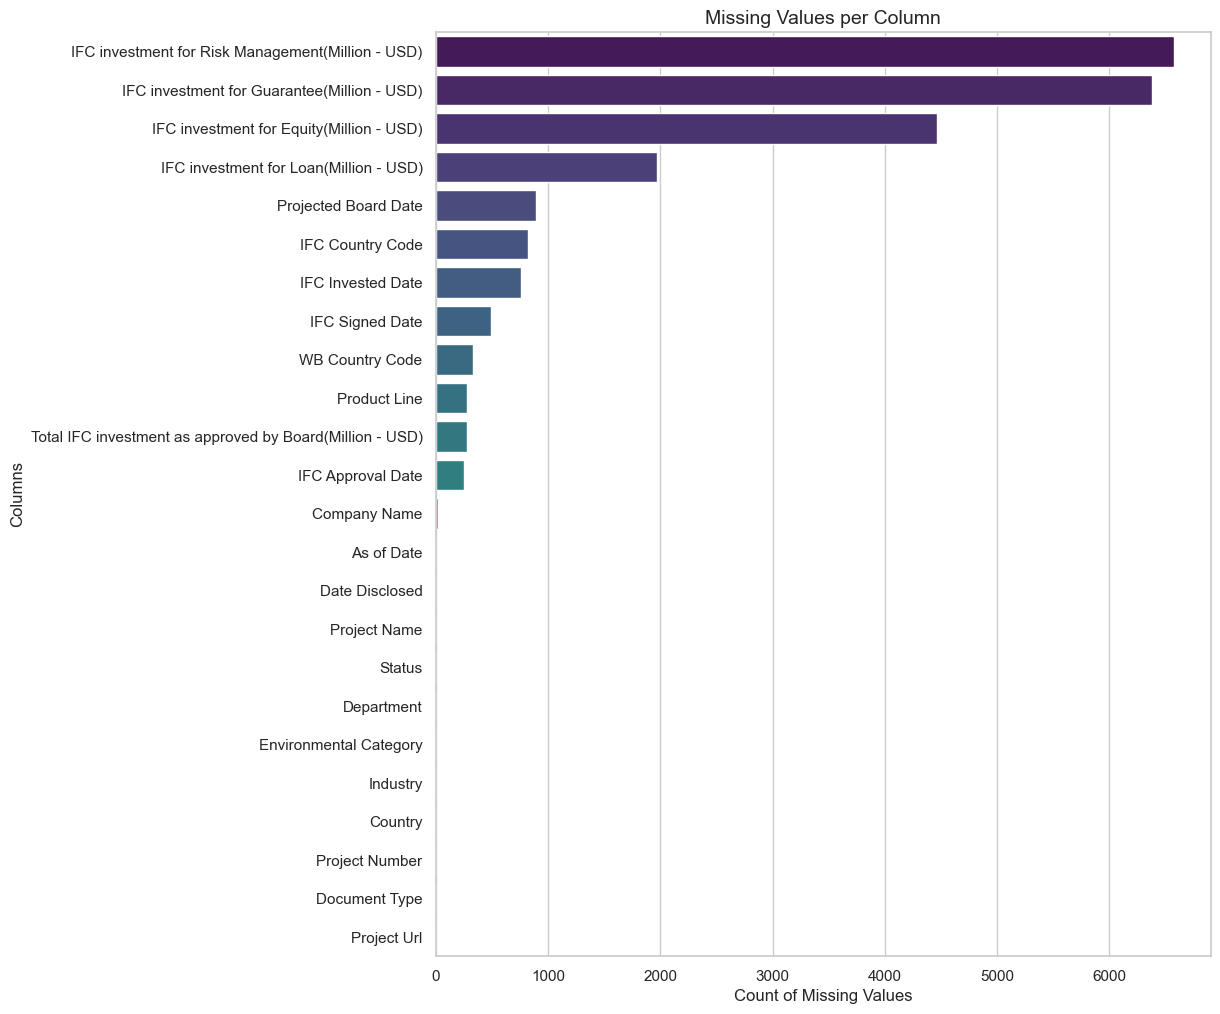

In [22]:
# Missing values count
missing_counts = df.isnull().sum().sort_values(ascending=False)

plt.figure(figsize=(10, 12))
sns.barplot(x=missing_counts, y=missing_counts.index, palette='viridis')
plt.title("Missing Values per Column", fontsize=14)
plt.xlabel("Count of Missing Values")
plt.ylabel("Columns")
plt.show()


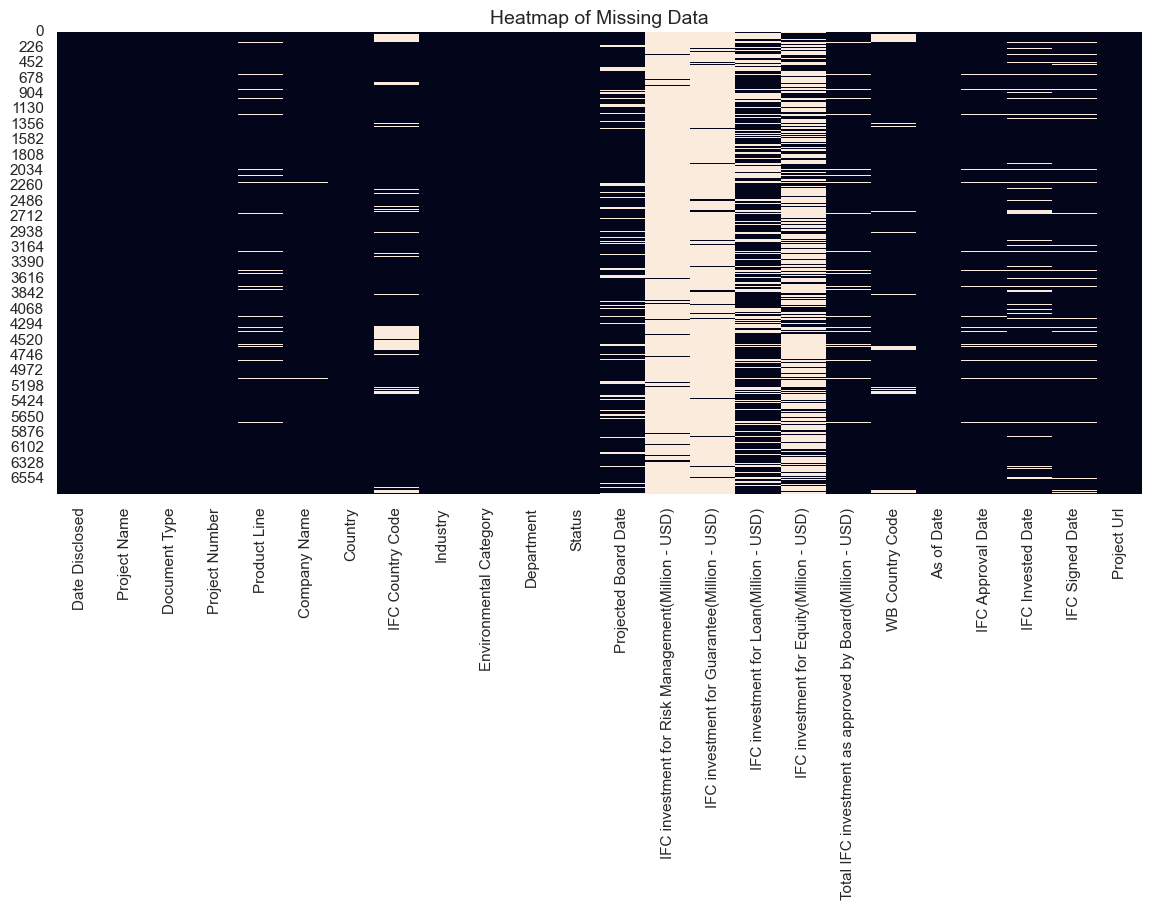

In [23]:
plt.figure(figsize=(14, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Heatmap of Missing Data", fontsize=14)
plt.show()



In [24]:
df.dtypes.value_counts()


object            12
datetime64[ns]     6
float64            5
int64              1
dtype: int64

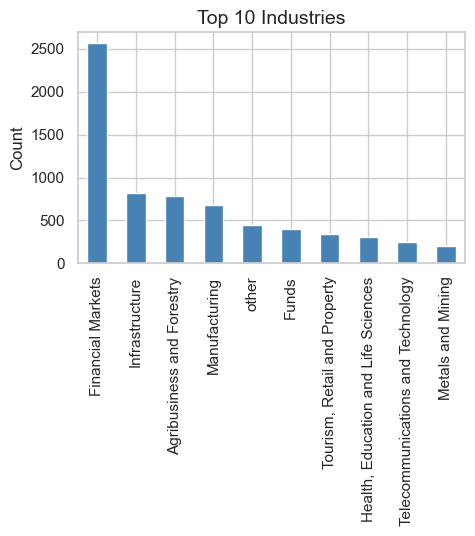

In [27]:
plt.figure(figsize=(5,3))
df['Industry'].value_counts().head(10).plot(kind='bar', color='steelblue')
plt.title("Top 10 Industries", fontsize=14)
plt.ylabel("Count")
plt.show()


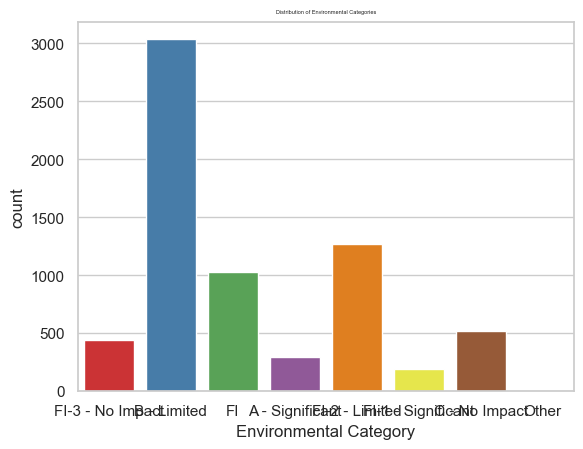

In [32]:
sns.countplot(data=df, x='Environmental Category', palette='Set1')
plt.title("Distribution of Environmental Categories", fontsize=4)
plt.show()


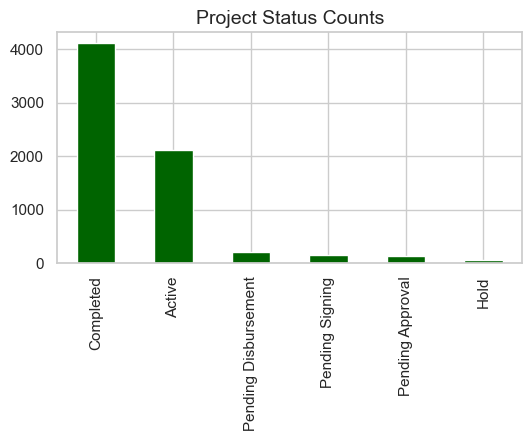

In [49]:
plt.figure(figsize=(6,3))
df['Status'].value_counts().plot(kind='bar', color='darkgreen')
plt.title("Project Status Counts", fontsize=14)
plt.show()


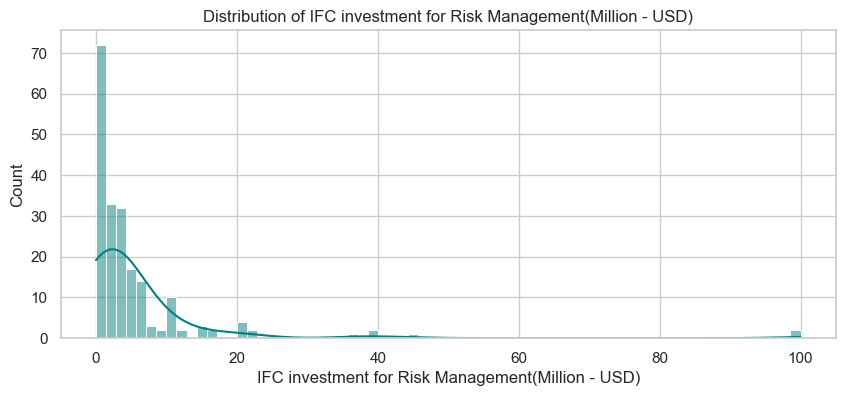

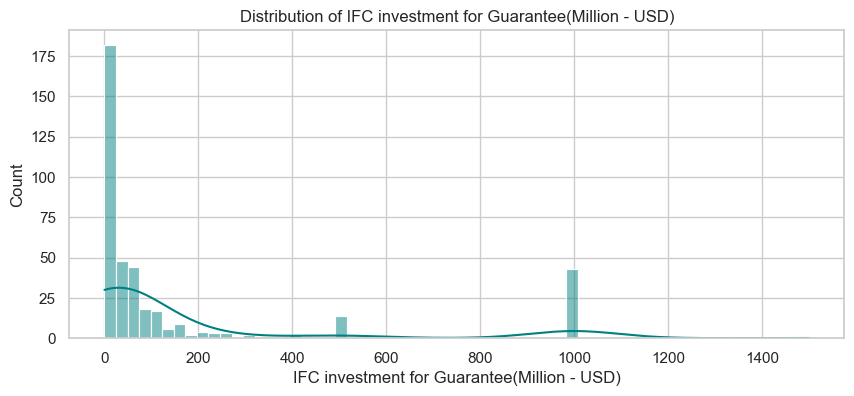

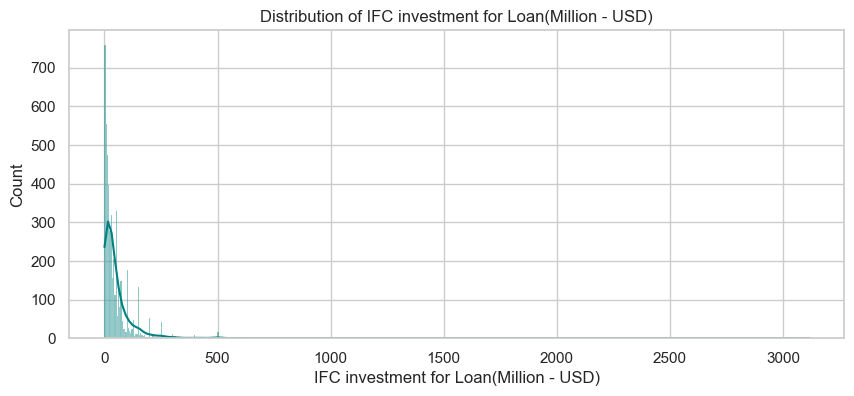

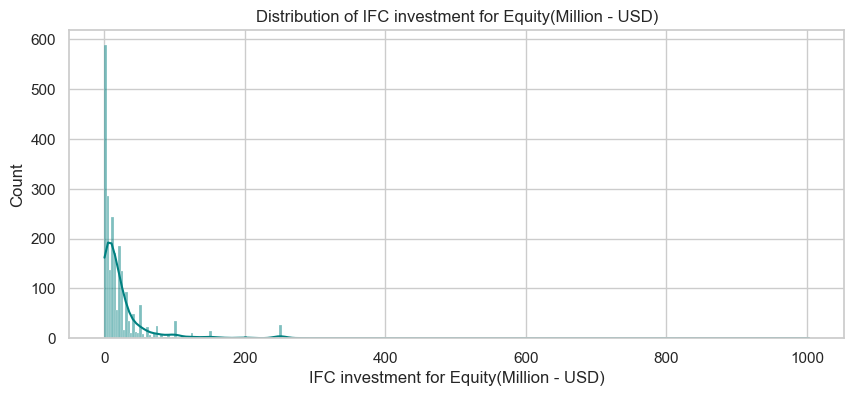

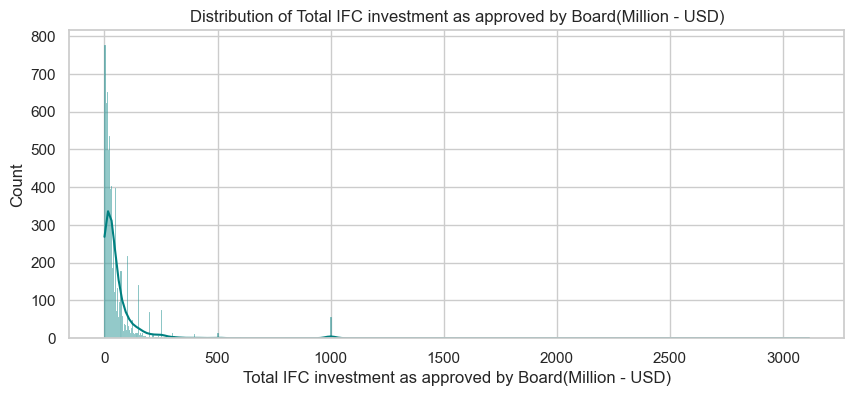

In [34]:
num_cols = [
    'IFC investment for Risk Management(Million - USD)',
    'IFC investment for Guarantee(Million - USD)',
    'IFC investment for Loan(Million - USD)',
    'IFC investment for Equity(Million - USD)',
    'Total IFC investment as approved by Board(Million - USD)'
]

for col in num_cols:
    plt.figure(figsize=(10,4))
    sns.histplot(df[col], kde=True, color='teal')
    plt.title(f"Distribution of {col}")
    plt.show()


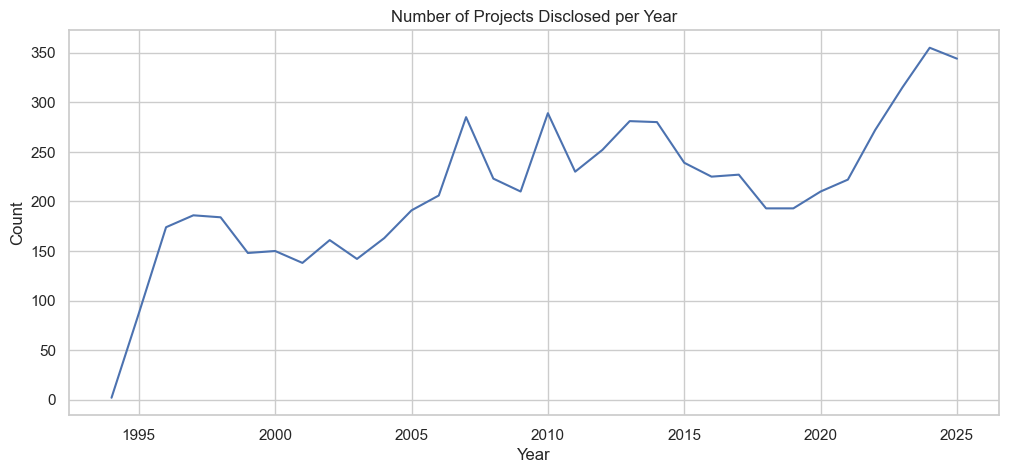

In [35]:
df_temp = df.copy()
date_cols = ['Date Disclosed', 'IFC Approval Date', 'IFC Signed Date', 'IFC Invested Date']

for col in date_cols:
    df_temp[col] = pd.to_datetime(df_temp[col], errors='coerce')

# Yearly trends
df_temp['Year Disclosed'] = df_temp['Date Disclosed'].dt.year

plt.figure(figsize=(12,5))
df_temp['Year Disclosed'].value_counts().sort_index().plot()
plt.title("Number of Projects Disclosed per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


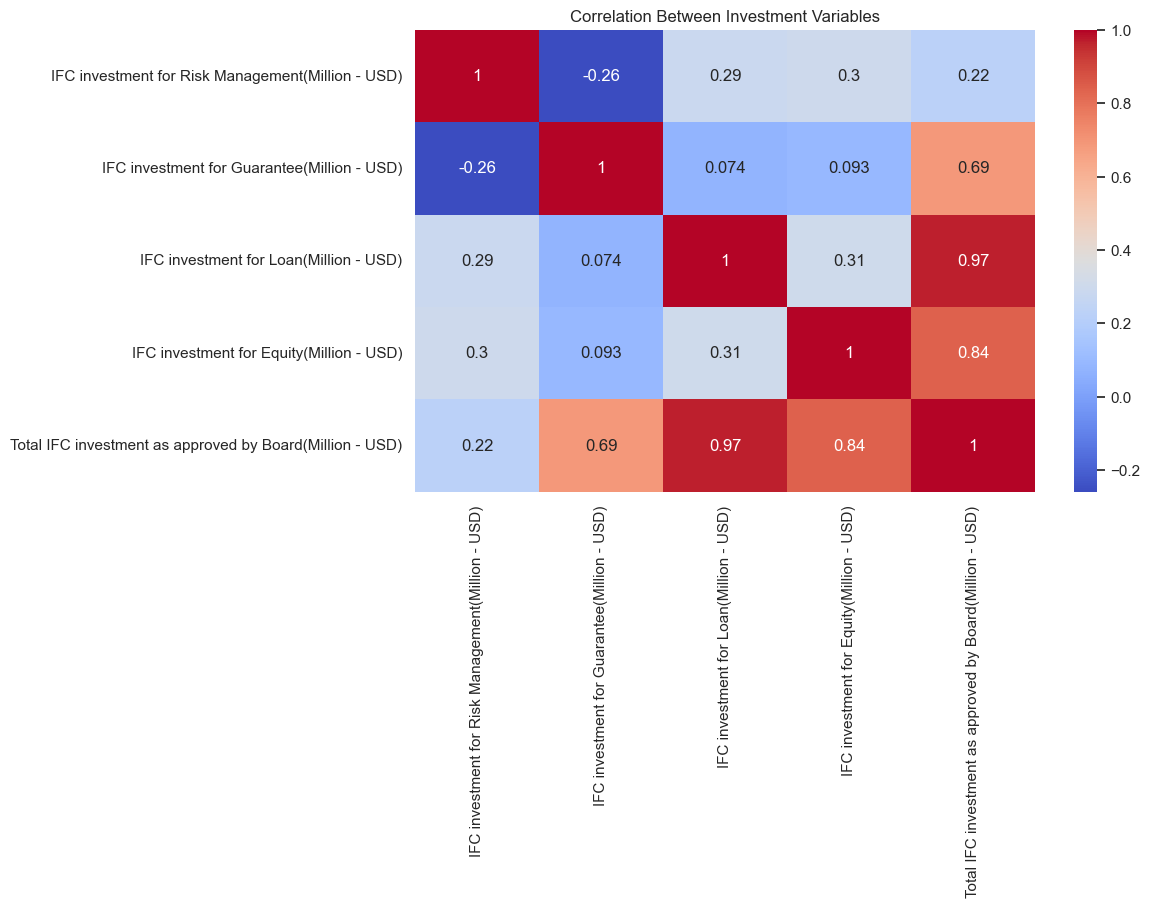

In [36]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Investment Variables")
plt.show()


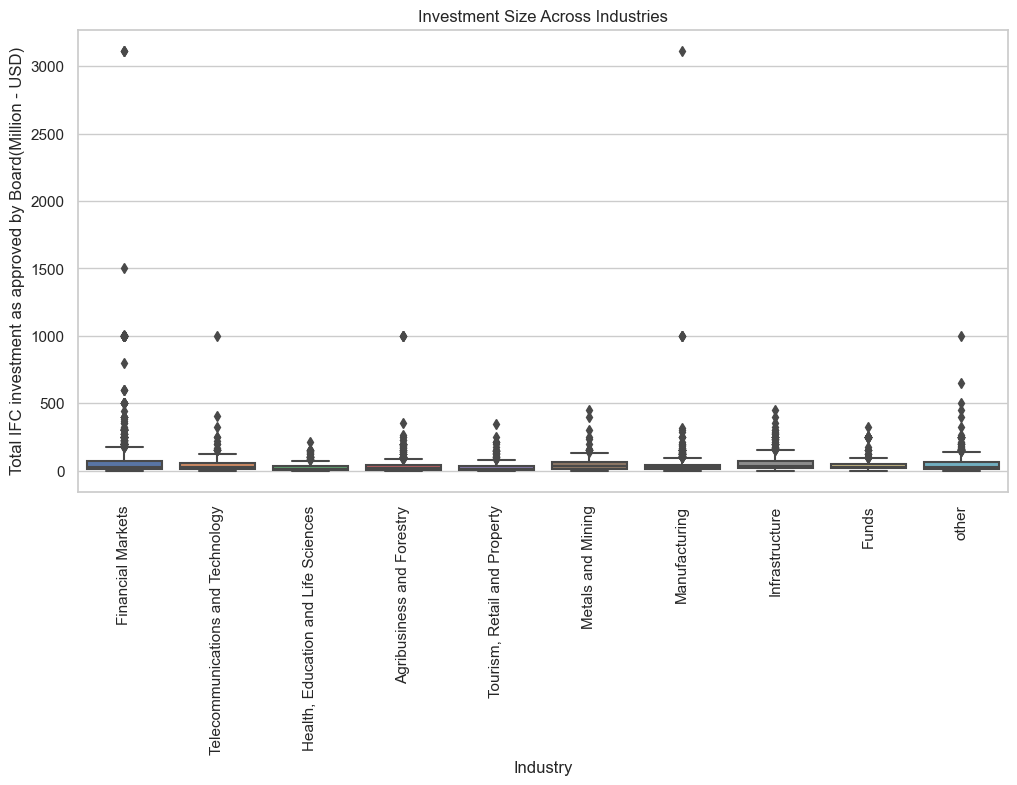

In [37]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Industry',
            y='Total IFC investment as approved by Board(Million - USD)')
plt.xticks(rotation=90)
plt.title("Investment Size Across Industries")
plt.show()


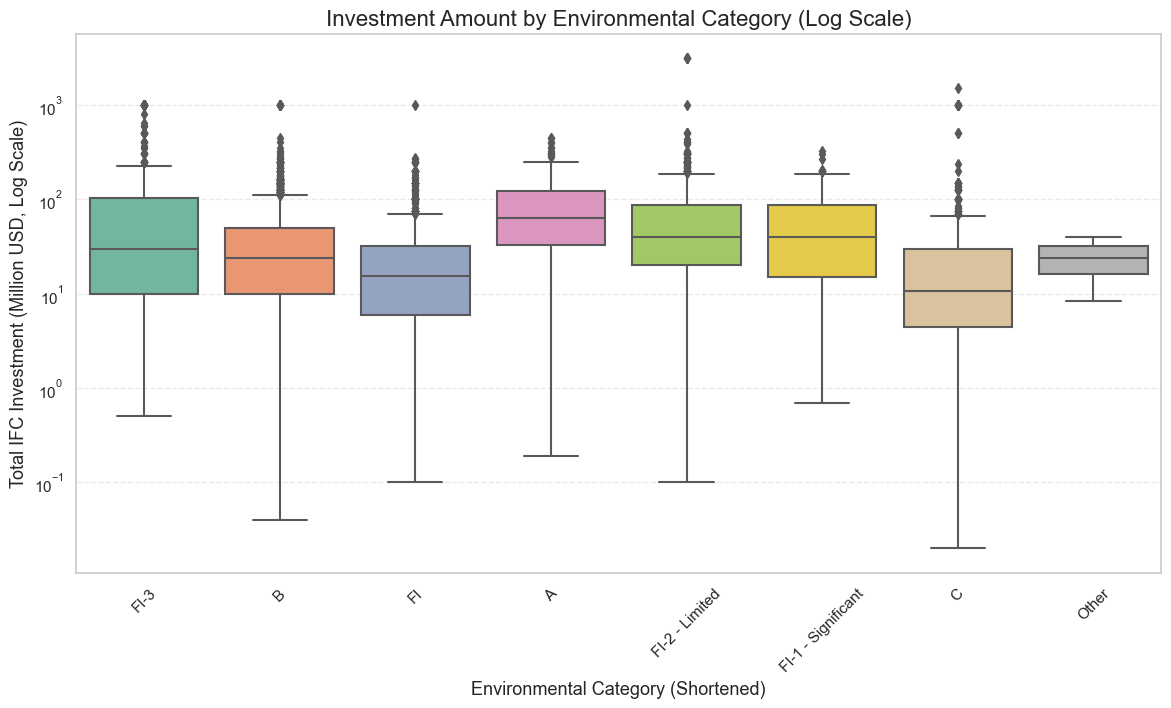

In [39]:
plt.figure(figsize=(14, 7))


df['EnvCatShort'] = df['Environmental Category'].replace({
    'A - Significant': 'A',
    'B - Limited': 'B',
    'C - No Impact': 'C',
    'FI': 'FI',
    'FI-1': 'FI-1',
    'FI-2': 'FI-2',
    'FI-3 - No Impact': 'FI-3',
    'Other': 'Other'
})

sns.boxplot(
    data=df,
    x='EnvCatShort',
    y='Total IFC investment as approved by Board(Million - USD)',
    palette='Set2'
)

plt.yscale('log')   
plt.title("Investment Amount by Environmental Category (Log Scale)", fontsize=16)
plt.xlabel("Environmental Category (Shortened)", fontsize=13)
plt.ylabel("Total IFC Investment (Million USD, Log Scale)", fontsize=13)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.show()


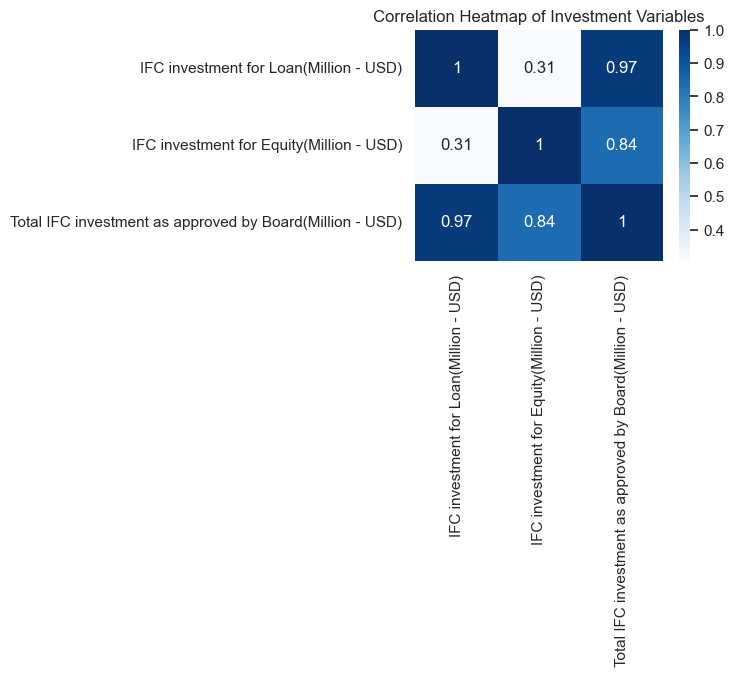

In [48]:
numeric_df = df[num_cols].copy()

plt.figure(figsize=(4, 3))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues')
plt.title("Correlation Heatmap of Investment Variables")
plt.show()



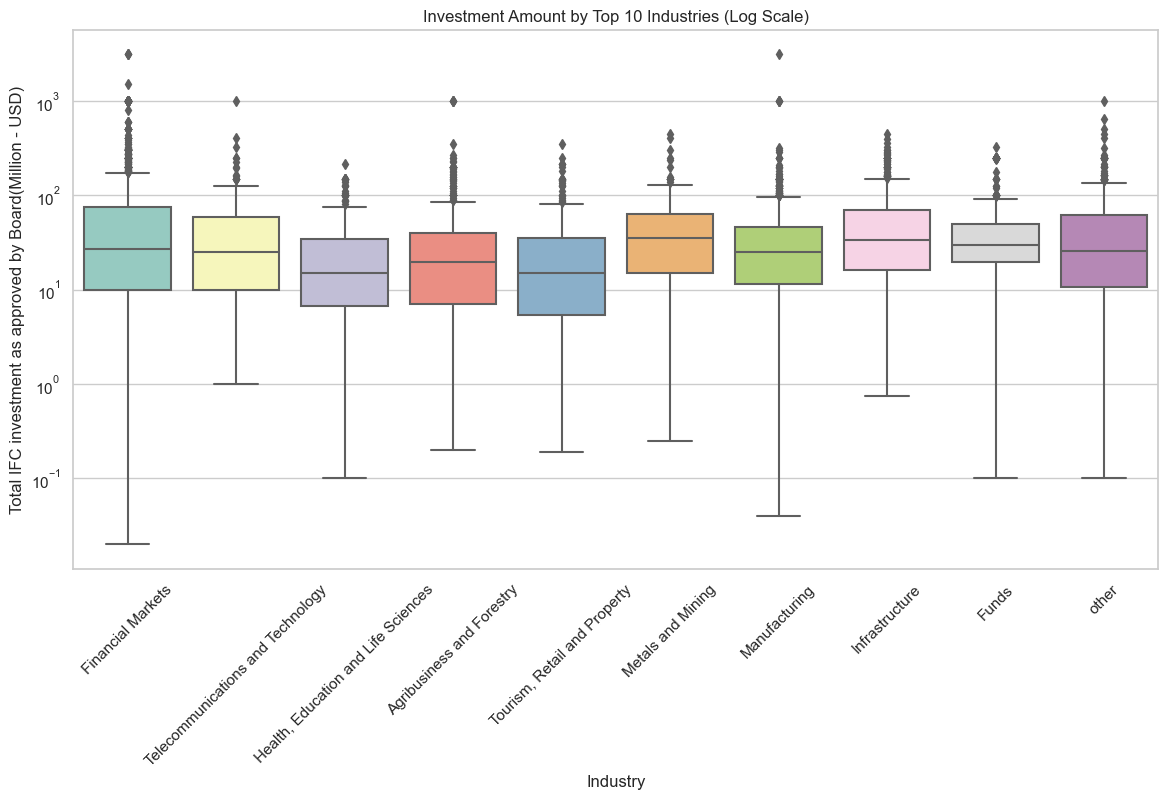

In [42]:
plt.figure(figsize=(14, 7))
top_industries = df['Industry'].value_counts().head(10).index
sns.boxplot(
    data=df[df['Industry'].isin(top_industries)],
    x='Industry',
    y='Total IFC investment as approved by Board(Million - USD)',
    palette='Set3'
)
plt.xticks(rotation=45)
plt.yscale('log')
plt.title("Investment Amount by Top 10 Industries (Log Scale)")
plt.show()


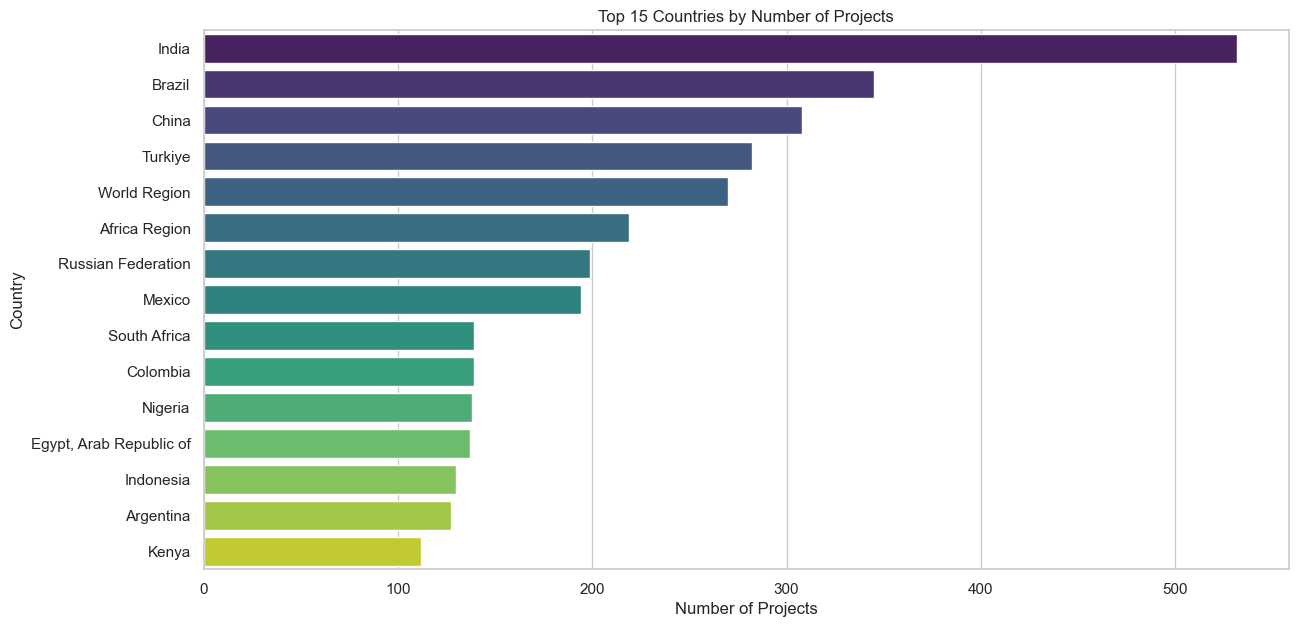

In [43]:
plt.figure(figsize=(14, 7))
top_countries = df['Country'].value_counts().head(15)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title("Top 15 Countries by Number of Projects")
plt.xlabel("Number of Projects")
plt.ylabel("Country")
plt.show()


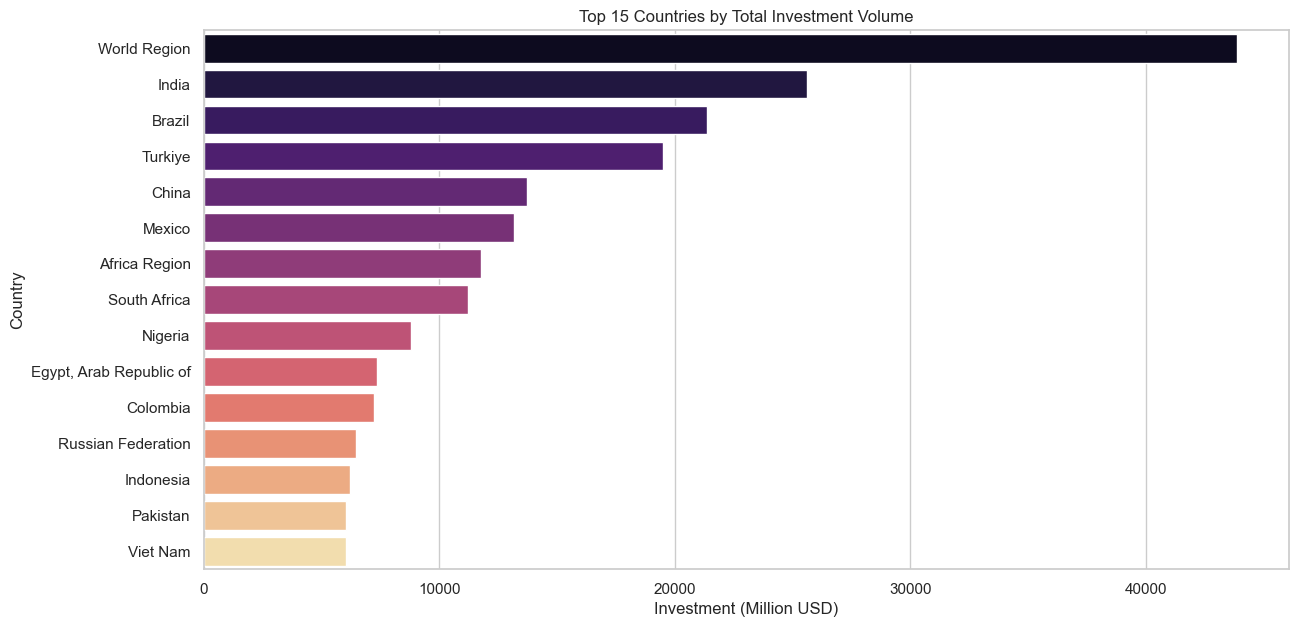

In [44]:
country_investment = df.groupby('Country')['Total IFC investment as approved by Board(Million - USD)'].sum().sort_values(ascending=False).head(15)

plt.figure(figsize=(14, 7))
sns.barplot(x=country_investment.values, y=country_investment.index, palette='magma')
plt.title("Top 15 Countries by Total Investment Volume")
plt.xlabel("Investment (Million USD)")
plt.ylabel("Country")
plt.show()


In [45]:
df_dates = df.copy()
df_dates['Date Disclosed'] = pd.to_datetime(df_dates['Date Disclosed'], errors='coerce')
df_dates['Year'] = df_dates['Date Disclosed'].dt.year


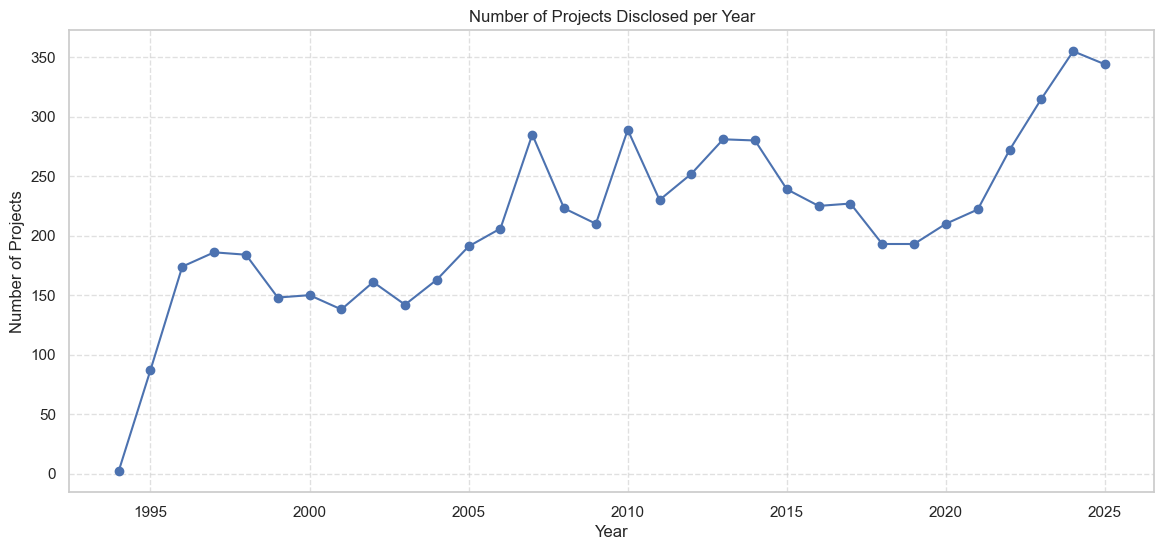

In [46]:
#number of projects
plt.figure(figsize=(14, 6))
df_dates['Year'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title("Number of Projects Disclosed per Year")
plt.xlabel("Year")
plt.ylabel("Number of Projects")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


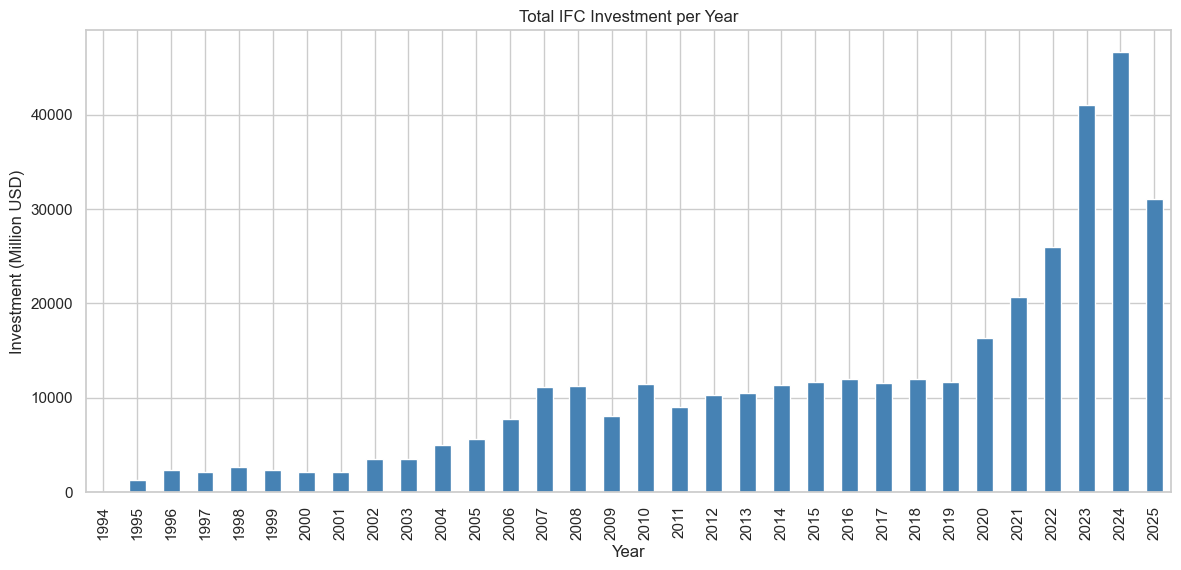

In [47]:
#Total investment
investment_per_year = df_dates.groupby('Year')['Total IFC investment as approved by Board(Million - USD)'].sum()

plt.figure(figsize=(14, 6))
investment_per_year.plot(kind='bar', color='steelblue')
plt.title("Total IFC Investment per Year")
plt.ylabel("Investment (Million USD)")
plt.xlabel("Year")
plt.show()


3. Data Cleaning

In [50]:
cols_to_drop = [
    'Project Name', 'Project Url', 'Company Name', 'Project Number',
    'IFC investment for Risk Management(Million - USD)',
    'IFC investment for Guarantee(Million - USD)'
]

df_clean = df.drop(columns=cols_to_drop)


In [51]:
#Missing Values

In [52]:
investment_cols = [
    'IFC investment for Equity(Million - USD)',
    'IFC investment for Loan(Million - USD)',
    'Total IFC investment as approved by Board(Million - USD)'
]

df_clean[investment_cols] = df_clean[investment_cols].fillna(0)


In [53]:
#Fill mode

In [54]:
cat_cols = df_clean.select_dtypes(include='object').columns

for col in cat_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])


In [55]:
#Date cols

In [56]:
date_cols = [
    'Date Disclosed', 'Projected Board Date', 'IFC Approval Date',
    'IFC Signed Date', 'IFC Invested Date', 'As of Date'
]

for col in date_cols:
    df_clean[col] = pd.to_datetime(df_clean[col], errors='coerce')


In [57]:
#Feature Engineering

In [58]:
df_clean['Year'] = df_clean['Date Disclosed'].dt.year


In [59]:
df_clean['Approval_Delay'] = (df_clean['IFC Approval Date'] - df_clean['Date Disclosed']).dt.days
df_clean['Signing_Delay']  = (df_clean['IFC Signed Date'] - df_clean['IFC Approval Date']).dt.days
df_clean['Invest_Delay']   = (df_clean['IFC Invested Date'] - df_clean['IFC Signed Date']).dt.days


In [60]:
# Nan handling

In [61]:
delay_cols = ['Approval_Delay', 'Signing_Delay', 'Invest_Delay']
for col in delay_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())


In [62]:
df_clean.info()
df_clean.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6777 entries, 0 to 6776
Data columns (total 23 columns):
 #   Column                                                    Non-Null Count  Dtype         
---  ------                                                    --------------  -----         
 0   Date Disclosed                                            6777 non-null   datetime64[ns]
 1   Document Type                                             6777 non-null   object        
 2   Product Line                                              6777 non-null   object        
 3   Country                                                   6777 non-null   object        
 4   IFC Country Code                                          6777 non-null   object        
 5   Industry                                                  6777 non-null   object        
 6   Environmental Category                                    6777 non-null   object        
 7   Department                                

Date Disclosed                                                0
Document Type                                                 0
Product Line                                                  0
Country                                                       0
IFC Country Code                                              0
Industry                                                      0
Environmental Category                                        0
Department                                                    0
Status                                                        0
Projected Board Date                                        892
IFC investment for Loan(Million - USD)                        0
IFC investment for Equity(Million - USD)                      0
Total IFC investment as approved by Board(Million - USD)      0
WB Country Code                                               0
As of Date                                                    0
IFC Approval Date                       

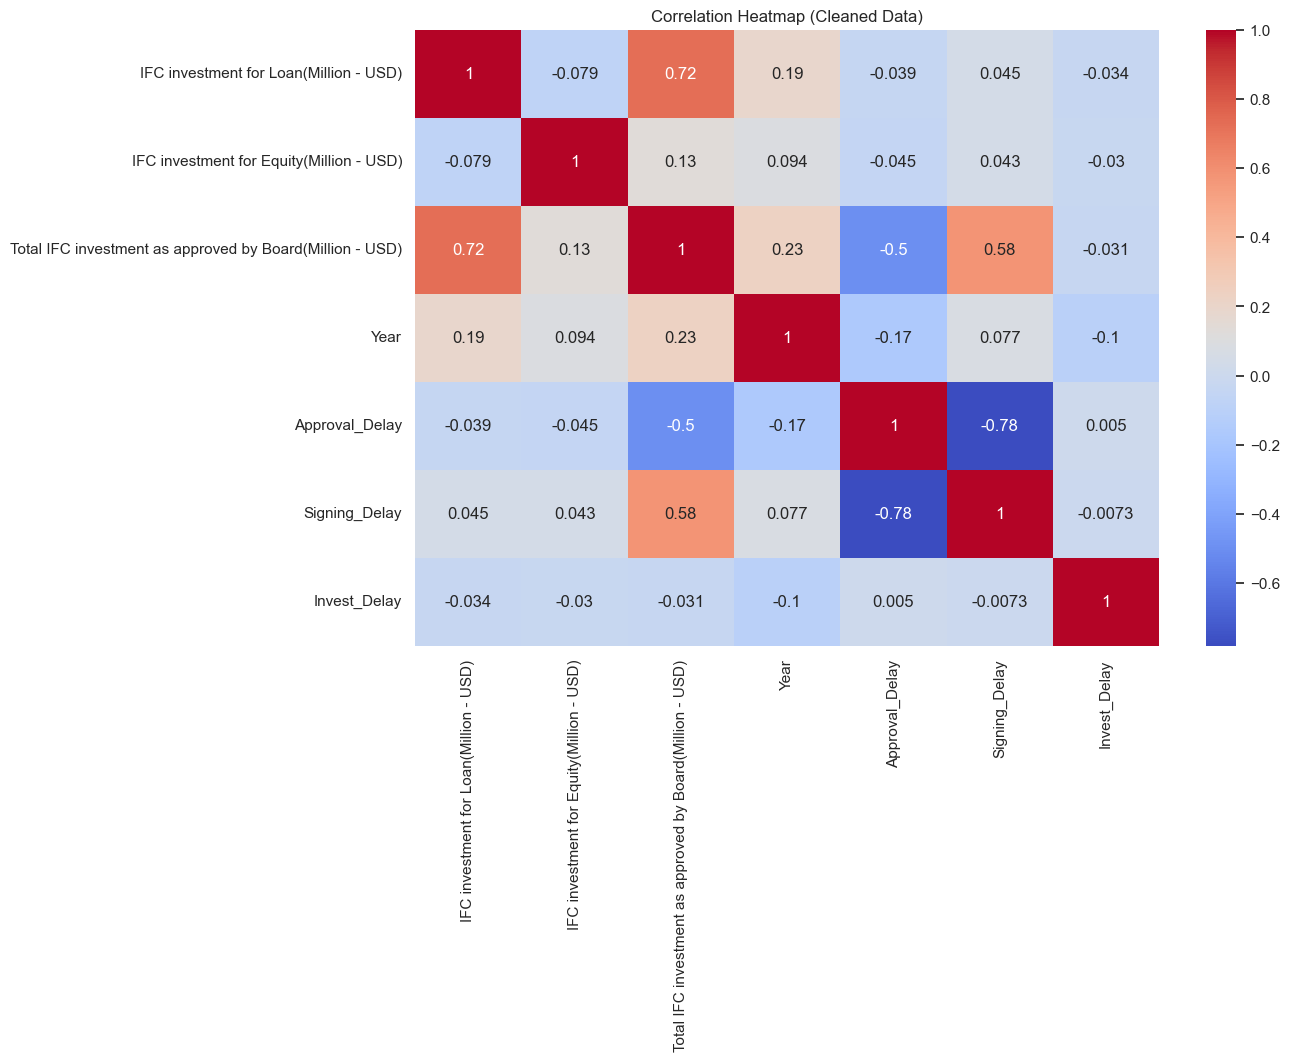

In [63]:
numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12, 8))
sns.heatmap(df_clean[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Cleaned Data)")
plt.show()


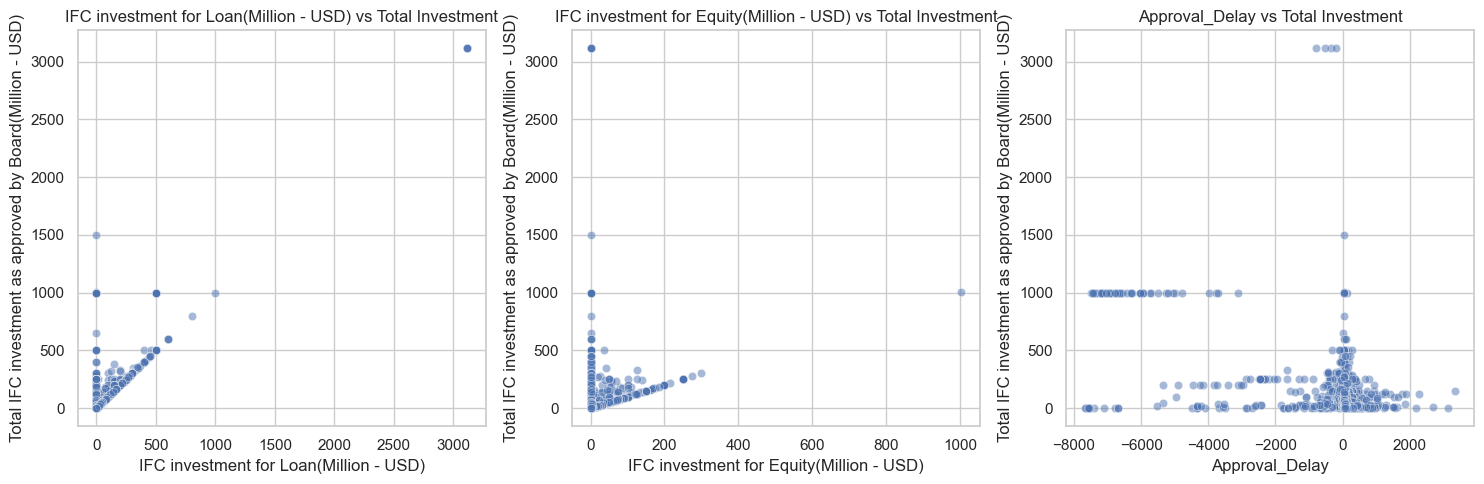

In [64]:
target = 'Total IFC investment as approved by Board(Million - USD)'
important_features = [
    'IFC investment for Loan(Million - USD)',
    'IFC investment for Equity(Million - USD)',
    'Approval_Delay'
]

plt.figure(figsize=(15, 5))
for i, col in enumerate(important_features, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(data=df_clean, x=col, y=target, alpha=0.5)
    plt.title(f"{col} vs Total Investment")
plt.tight_layout()
plt.show()


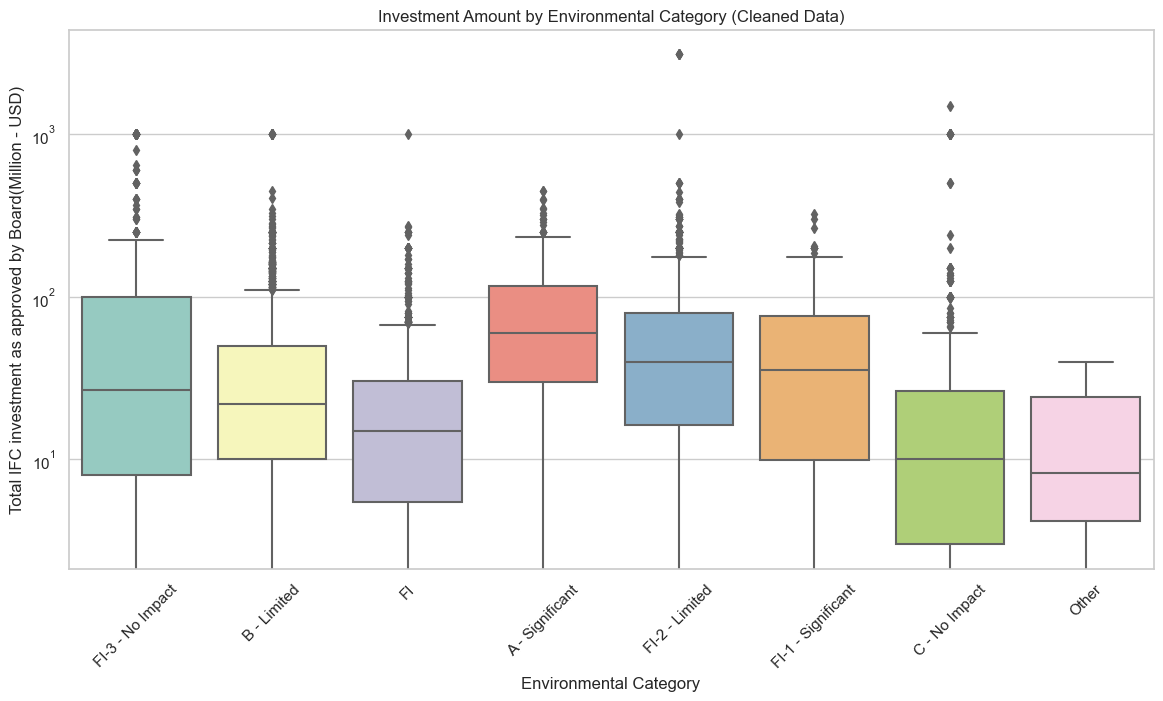

In [65]:
plt.figure(figsize=(14, 7))
sns.boxplot(
    data=df_clean,
    x='Environmental Category',
    y='Total IFC investment as approved by Board(Million - USD)',
    palette='Set3'
)
plt.yscale('log')
plt.title("Investment Amount by Environmental Category (Cleaned Data)")
plt.xticks(rotation=45)
plt.show()


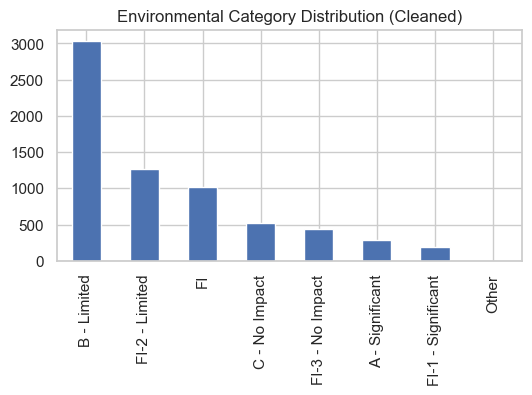

In [67]:
df_clean['Environmental Category'].value_counts().plot(kind='bar', figsize=(6,3))
plt.title("Environmental Category Distribution (Cleaned)")
plt.show()


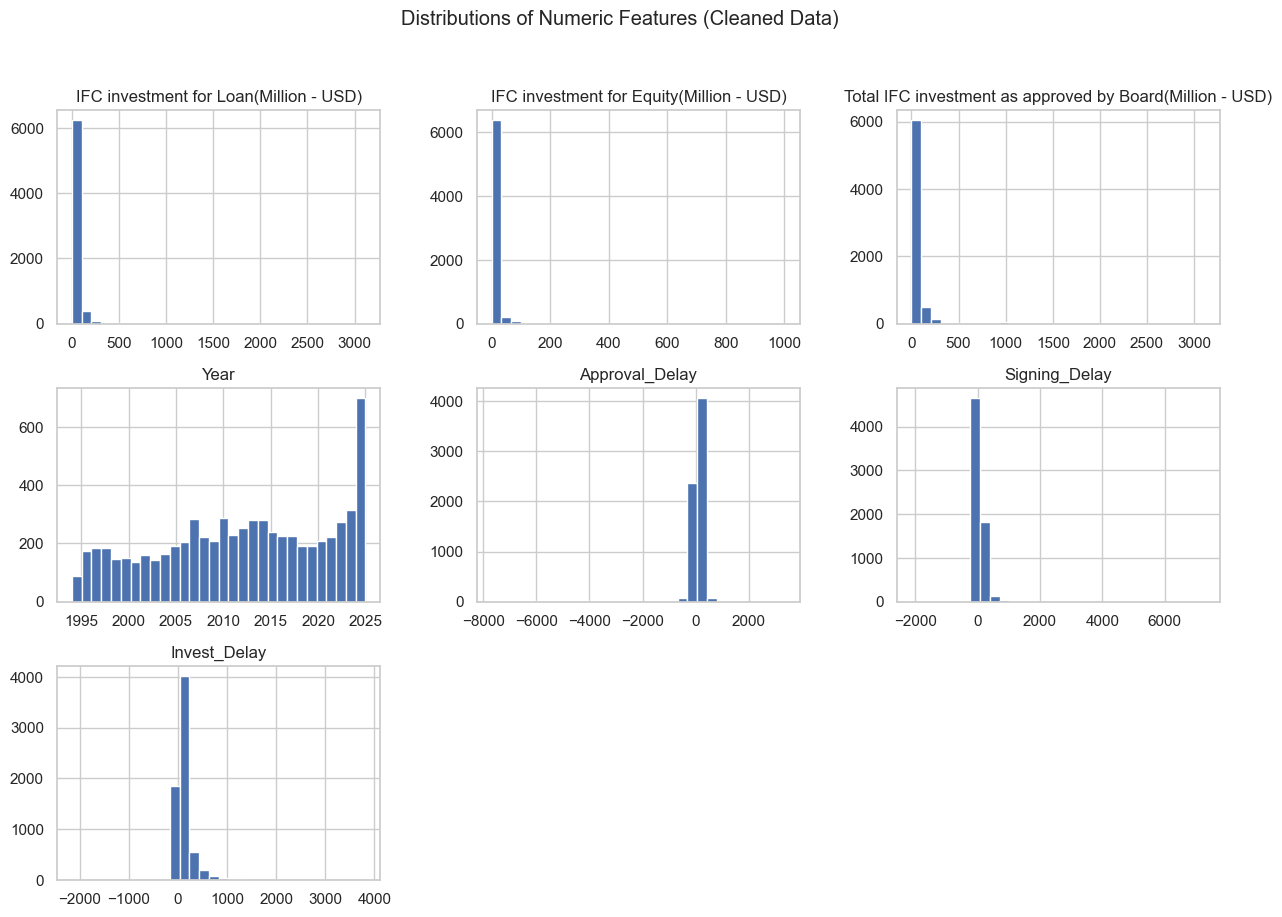

In [68]:
df_clean[numeric_cols].hist(figsize=(15, 10), bins=30)
plt.suptitle("Distributions of Numeric Features (Cleaned Data)")
plt.show()


In [69]:
# Data preproceesing for regression

In [70]:
# Total IFC investment as approved by Board(Million - USD) -target variabale

selected numeric features:                    
IFC investment for Loan(Million - USD)

IFC investment for Equity(Million - USD)

Approval_Delay

Signing_Delay

Invest_Delay

Year

Industry

Environmental Category

Country

IFC Country Code

Department

Document Type

Product Line

Status


In [72]:
target = "Total IFC investment as approved by Board(Million - USD)"

X = df_clean.drop(columns=[target])
y = df_clean[target]


In [73]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

categorical_features = X.select_dtypes(include=['object']).columns.tolist()


In [74]:
numeric_features

['IFC investment for Loan(Million - USD)',
 'IFC investment for Equity(Million - USD)',
 'Year',
 'Approval_Delay',
 'Signing_Delay',
 'Invest_Delay']

In [75]:
categorical_features

['Document Type',
 'Product Line',
 'Country',
 'IFC Country Code',
 'Industry',
 'Environmental Category',
 'Department',
 'Status',
 'WB Country Code',
 'EnvCatShort']

In [76]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)


In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Model 1

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

linreg_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', LinearRegression())
])

linreg_model.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['IFC investment for '
                                                   'Loan(Million - USD)',
                                                   'IFC investment for '
                                                   'Equity(Million - USD)',
                                                   'Year', 'Approval_Delay',
                                                   'Signing_Delay',
                                                   'Invest_Delay']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Document Type',
                                                   'Product Line', 'Country',
                                                   'IFC Country Code',
                                                   'Industry',
                                                   'Environmental Category',
                                                   'Department', 'Status',
                                                   'WB Country Code',
                                                   'EnvCatShort'])])),
                ('model', LinearRegression())])

In [80]:
from sklearn.ensemble import RandomForestRegressor

rf_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=200,
        random_state=42
    ))
])

rf_model.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['IFC investment for '
                                                   'Loan(Million - USD)',
                                                   'IFC investment for '
                                                   'Equity(Million - USD)',
                                                   'Year', 'Approval_Delay',
                                                   'Signing_Delay',
                                                   'Invest_Delay']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Document Type',
                                                   'Product Line', 'Country',
                                                   'IFC Country Code',
                                                   'Industry',
                                                   'Environmental Category',
                                                   'Department', 'Status',
                                                   'WB Country Code',
                                                   'EnvCatShort'])])),
                ('model',
                 RandomForestRegressor(n_estimators=200, random_state=42))])

In [81]:
from xgboost import XGBRegressor

xgb_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))
])

xgb_model.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['IFC investment for '
                                                   'Loan(Million - USD)',
                                                   'IFC investment for '
                                                   'Equity(Million - USD)',
                                                   'Year', 'Approval_Delay',
                                                   'Signing_Delay',
                                                   'Invest_Delay']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Document Type',
                                                   'Product Line', 'Country',
                                                   'IFC Country Code',
                                                   'Industry',
                                                   'Environmental...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=300, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate(model, X_test, y_test):
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    return mae, rmse, r2

models = {
    "Linear Regression": linreg_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

for name, model in models.items():
    mae, rmse, r2 = evaluate(model, X_test, y_test)
    print(f"{name}:")
    print(f"  MAE:  {mae:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R²:   {r2:.4f}\n")


Linear Regression:
  MAE:  19.3433
  RMSE: 48.0562
  R²:   0.8549

Random Forest:
  MAE:  4.4339
  RMSE: 37.1292
  R²:   0.9134

XGBoost:
  MAE:  5.2776
  RMSE: 30.3759
  R²:   0.9420



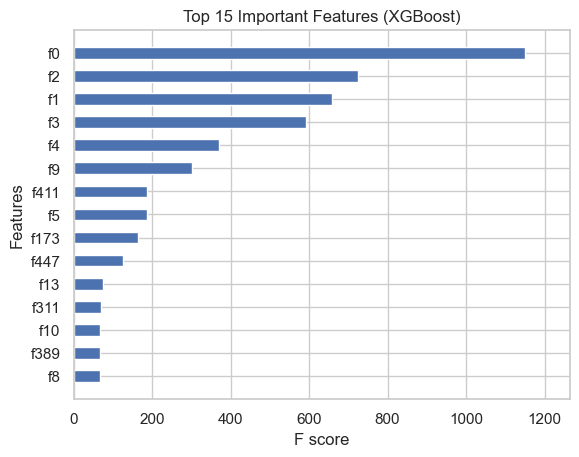

In [83]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Extract the model from pipeline
xgb_core = xgb_model.named_steps['model']

xgb.plot_importance(xgb_core, max_num_features=15, height=0.5, show_values=False)
plt.title("Top 15 Important Features (XGBoost)")
plt.show()


In [85]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate(model, X_test, y_test):
    preds = model.predict(X_test)
    mae  = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2   = r2_score(y_test, preds)
    return mae, rmse, r2

results = []

for name, model in models.items():
    mae, rmse, r2 = evaluate(model, X_test, y_test)
    results.append([name, mae, rmse, r2])

df_results = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R²"])
df_results


,Model,MAE,RMSE,R²
0,Linear Regression,19.343325,48.056163,0.854888
1,Random Forest,4.433857,37.129239,0.913376
2,XGBoost,5.277568,30.375921,0.942022


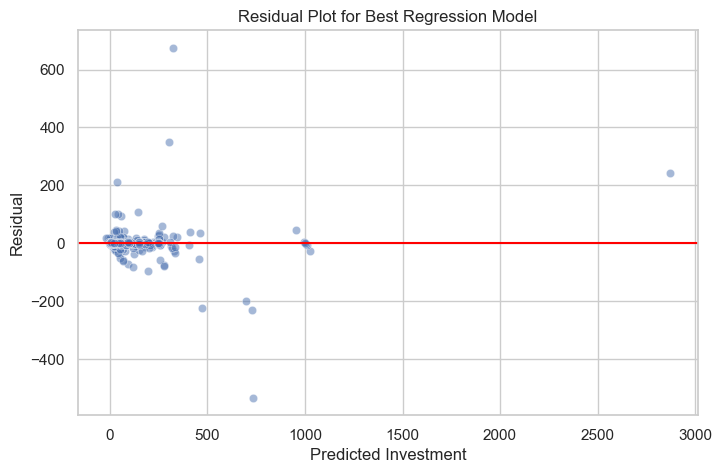

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

best_model = xgb_model  

preds = best_model.predict(X_test)
residuals = y_test - preds

plt.figure(figsize=(8,5))
sns.scatterplot(x=preds, y=residuals, alpha=0.5)
plt.axhline(0, color='red')
plt.title("Residual Plot for Best Regression Model")
plt.xlabel("Predicted Investment")
plt.ylabel("Residual")
plt.show()


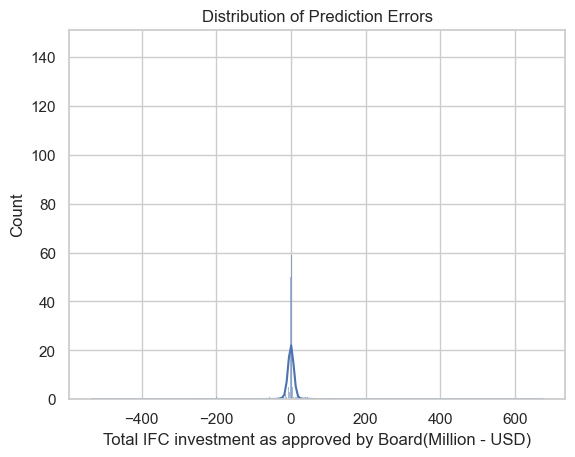

In [87]:
sns.histplot(residuals, kde=True)
plt.title("Distribution of Prediction Errors")
plt.show()


In [88]:
#Data Preprocessing for Classification

In [89]:
clf_target = "Environmental Category"


In [90]:
X_clf = df_clean.drop(columns=[clf_target])
y_clf = df_clean[clf_target]


In [91]:
numeric_features_clf = X_clf.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features_clf = X_clf.select_dtypes(include=['object']).columns.tolist()


In [95]:
numeric_features_clf
categorical_features_clf

['Document Type',
 'Product Line',
 'Country',
 'IFC Country Code',
 'Industry',
 'Department',
 'Status',
 'WB Country Code',
 'EnvCatShort']

In [96]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_clf_encoded = le.fit_transform(y_clf)


In [97]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

clf_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features_clf),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_clf),
    ]
)


In [98]:
from sklearn.model_selection import train_test_split

Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_clf, y_clf_encoded, test_size=0.2, random_state=42, stratify=y_clf_encoded
)


In [99]:
#logistic regression

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

logreg_model = Pipeline(steps=[
    ('preprocess', clf_preprocessor),
    ('model', LogisticRegression(max_iter=500, multi_class='ovr'))
])

logreg_model.fit(Xc_train, yc_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['IFC investment for '
                                                   'Loan(Million - USD)',
                                                   'IFC investment for '
                                                   'Equity(Million - USD)',
                                                   'Total IFC investment as '
                                                   'approved by Board(Million '
                                                   '- USD)',
                                                   'Year', 'Approval_Delay',
                                                   'Signing_Delay',
                                                   'Invest_Delay']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Document Type',
                                                   'Product Line', 'Country',
                                                   'IFC Country Code',
                                                   'Industry', 'Department',
                                                   'Status', 'WB Country Code',
                                                   'EnvCatShort'])])),
                ('model', LogisticRegression(max_iter=500, multi_class='ovr'))])

In [101]:
#Random forest

In [104]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = Pipeline(steps=[
    ('preprocess', clf_preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight='balanced'
    ))
])

rf_clf.fit(Xc_train, yc_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['IFC investment for '
                                                   'Loan(Million - USD)',
                                                   'IFC investment for '
                                                   'Equity(Million - USD)',
                                                   'Total IFC investment as '
                                                   'approved by Board(Million '
                                                   '- USD)',
                                                   'Year', 'Approval_Delay',
                                                   'Signing_Delay',
                                                   'Invest_Delay']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Document Type',
                                                   'Product Line', 'Country',
                                                   'IFC Country Code',
                                                   'Industry', 'Department',
                                                   'Status', 'WB Country Code',
                                                   'EnvCatShort'])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, random_state=42))])

In [105]:
# Xgboost classifier

In [106]:
from xgboost import XGBClassifier

xgb_clf = Pipeline(steps=[
    ('preprocess', clf_preprocessor),
    ('model', XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        eval_metric='mlogloss'
    ))
])

xgb_clf.fit(Xc_train, yc_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['IFC investment for '
                                                   'Loan(Million - USD)',
                                                   'IFC investment for '
                                                   'Equity(Million - USD)',
                                                   'Total IFC investment as '
                                                   'approved by Board(Million '
                                                   '- USD)',
                                                   'Year', 'Approval_Delay',
                                                   'Signing_Delay',
                                                   'Invest_Delay']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Document Type',
                                                   'Product Lin...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [107]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

def evaluate_classifier(model, X_test, y_test):
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, average='weighted', zero_division=0)
    rec = recall_score(y_test, preds, average='weighted', zero_division=0)
    f1 = f1_score(y_test, preds, average='weighted', zero_division=0)
    return acc, prec, rec, f1


In [108]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_conf_matrix(model, X_test, y_test, title):
    preds = model.predict(X_test)
    cm = confusion_matrix(y_test, preds)
    
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
                xticklabels=le.classes_,
                yticklabels=le.classes_)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


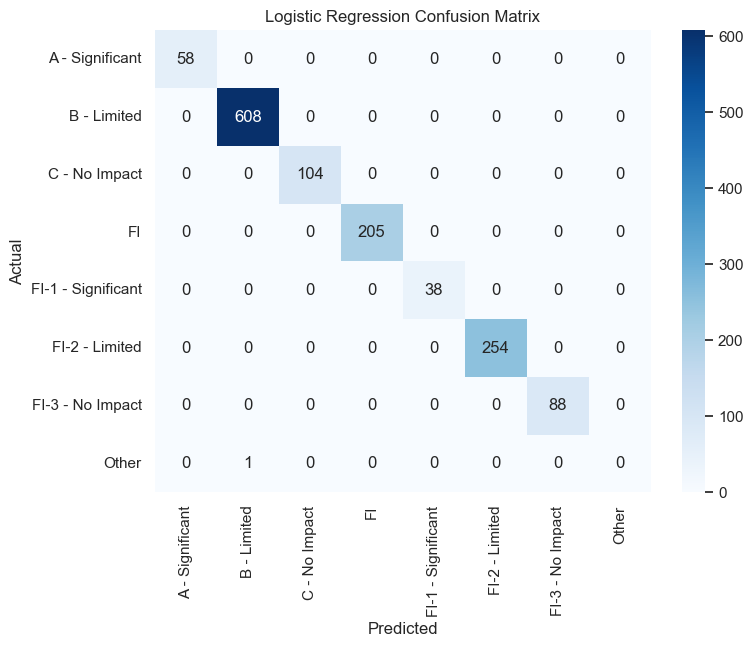

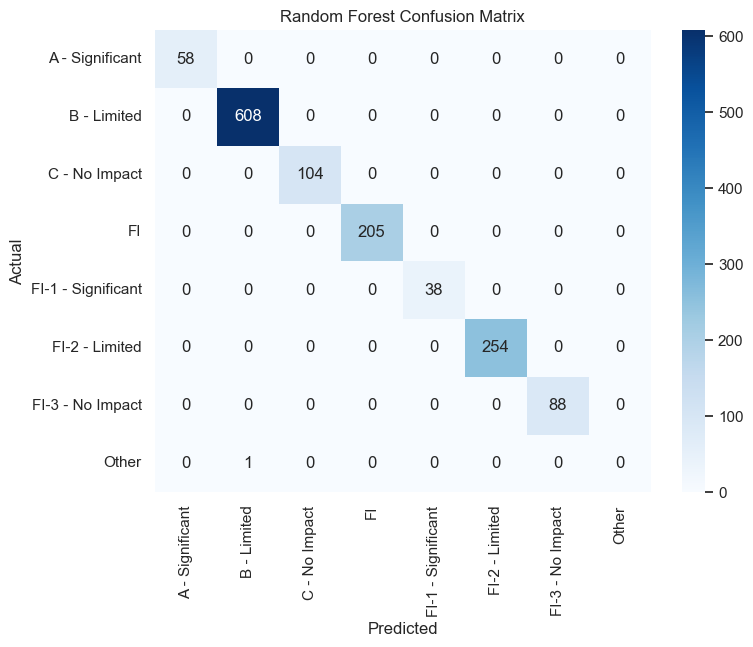

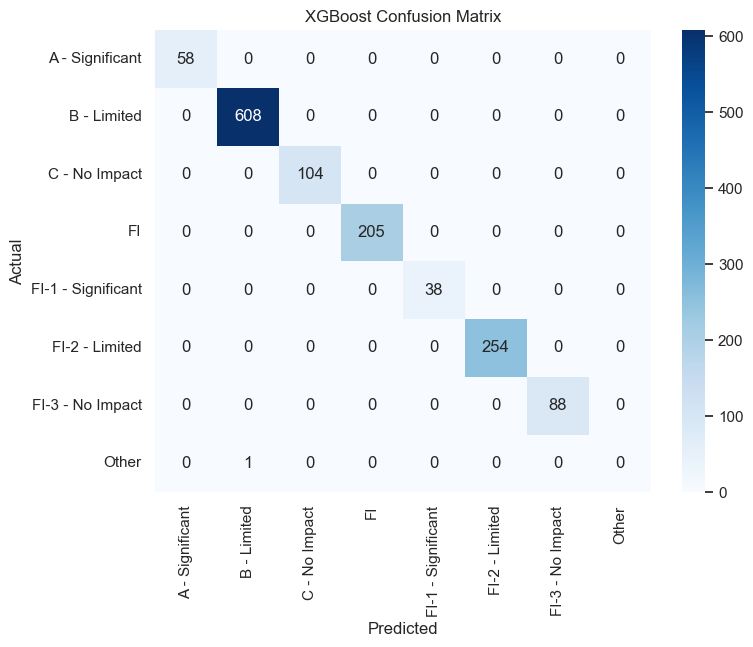

In [109]:
plot_conf_matrix(logreg_model, Xc_test, yc_test, "Logistic Regression Confusion Matrix")
plot_conf_matrix(rf_clf, Xc_test, yc_test, "Random Forest Confusion Matrix")
plot_conf_matrix(xgb_clf, Xc_test, yc_test, "XGBoost Confusion Matrix")


In [110]:
models_clf = {
    "Logistic Regression": logreg_model,
    "Random Forest": rf_clf,
    "XGBoost": xgb_clf
}

results_clf = []

for name, model in models_clf.items():
    acc, prec, rec, f1 = evaluate_classifier(model, Xc_test, yc_test)
    results_clf.append([name, acc, prec, rec, f1])

df_results_clf = pd.DataFrame(
    results_clf,
    columns=["Model", "Accuracy", "Precision", "Recall", "F1-score"]
)

df_results_clf


,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.999263,0.998526,0.999263,0.998894
1,Random Forest,0.999263,0.998526,0.999263,0.998894
2,XGBoost,0.999263,0.998526,0.999263,0.998894


In [112]:
df_temp = df_clean.copy()
df_temp["target"] = y_clf_encoded

df_temp.corr(numeric_only=True)["target"].sort_values(ascending=False).head(10)



target                                                      1.000000
Year                                                        0.356529
Total IFC investment as approved by Board(Million - USD)    0.134384
IFC investment for Equity(Million - USD)                    0.106871
Signing_Delay                                               0.098593
IFC investment for Loan(Million - USD)                      0.037757
Invest_Delay                                               -0.120330
Approval_Delay                                             -0.139335
Name: target, dtype: float64

In [113]:
set(X_clf.columns).intersection(set(df_clean["Environmental Category"]))


set()

In [114]:
df_clean.groupby("Environmental Category")[categorical_features_clf].nunique()


,Document Type,Product Line,Country,IFC Country Code,Industry,Department,Status,WB Country Code,EnvCatShort
Environmental Category,,,,,,,,,
A - Significant,2,4,85,72,8,26,6,81,1
B - Limited,2,4,150,112,10,71,6,137,1
C - No Impact,2,4,94,75,10,42,6,82,1
FI,2,4,123,100,10,30,4,113,1
FI-1 - Significant,2,3,67,52,7,29,5,57,1
FI-2 - Limited,2,4,121,99,9,69,6,107,1
FI-3 - No Impact,2,4,94,81,4,39,6,84,1
Other,2,1,3,3,3,3,2,3,1


In [115]:
y_clf.value_counts(normalize=True)


B - Limited           0.448133
FI-2 - Limited        0.187546
FI                    0.151099
C - No Impact         0.076435
FI-3 - No Impact      0.065073
A - Significant       0.043087
FI-1 - Significant    0.028184
Other                 0.000443
Name: Environmental Category, dtype: float64

In [116]:
df_clean.groupby("Environmental Category")["Industry"].nunique()


Environmental Category
A - Significant        8
B - Limited           10
C - No Impact         10
FI                    10
FI-1 - Significant     7
FI-2 - Limited         9
FI-3 - No Impact       4
Other                  3
Name: Industry, dtype: int64

In [117]:
y_clf.value_counts(normalize=True)


B - Limited           0.448133
FI-2 - Limited        0.187546
FI                    0.151099
C - No Impact         0.076435
FI-3 - No Impact      0.065073
A - Significant       0.043087
FI-1 - Significant    0.028184
Other                 0.000443
Name: Environmental Category, dtype: float64

In [118]:
df_clean.groupby("Environmental Category")["Industry"].nunique()


Environmental Category
A - Significant        8
B - Limited           10
C - No Impact         10
FI                    10
FI-1 - Significant     7
FI-2 - Limited         9
FI-3 - No Impact       4
Other                  3
Name: Industry, dtype: int64

In [119]:
for col in df_clean.columns:
    if col != "Environmental Category":
        print(col, df_clean.groupby(col)["Environmental Category"].nunique().max())


Date Disclosed 4
Document Type 8
Product Line 8
Country 8
IFC Country Code 8
Industry 8
Department 6
Status 8
Projected Board Date 5
IFC investment for Loan(Million - USD) 8
IFC investment for Equity(Million - USD) 8
Total IFC investment as approved by Board(Million - USD) 8
WB Country Code 8
As of Date 8
IFC Approval Date 5
IFC Invested Date 4
IFC Signed Date 6
EnvCatShort 1
Year 7
Approval_Delay 8
Signing_Delay 8
Invest_Delay 8


In [120]:
# Leakage identified

In [124]:

X_clf = df_clean.drop(columns=["Environmental Category"])
y_clf = df_clean["Environmental Category"]


In [125]:
# Drop the leakage column if it still exists
if 'EnvCatShort' in df_clean.columns:
    df_clean = df_clean.drop(columns=['EnvCatShort'])


In [126]:
clf_target = "Environmental Category"

X_clf = df_clean.drop(columns=[clf_target])
y_clf = df_clean[clf_target]


In [127]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_clf_encoded = le.fit_transform(y_clf)


In [128]:
numeric_features_clf = X_clf.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features_clf = X_clf.select_dtypes(include=['object']).columns.tolist()


In [129]:
numeric_features_clf

['IFC investment for Loan(Million - USD)',
 'IFC investment for Equity(Million - USD)',
 'Total IFC investment as approved by Board(Million - USD)',
 'Year',
 'Approval_Delay',
 'Signing_Delay',
 'Invest_Delay']

In [130]:
numeric_features_clf

['IFC investment for Loan(Million - USD)',
 'IFC investment for Equity(Million - USD)',
 'Total IFC investment as approved by Board(Million - USD)',
 'Year',
 'Approval_Delay',
 'Signing_Delay',
 'Invest_Delay']

In [131]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

clf_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features_clf),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_clf),
    ]
)


In [132]:
from sklearn.model_selection import train_test_split

Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_clf, y_clf_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_clf_encoded
)


In [135]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
logreg_model = Pipeline(steps=[
    ('preprocess', clf_preprocessor),
    ('model', LogisticRegression(max_iter=500, multi_class='ovr'))
])
logreg_model.fit(Xc_train, yc_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['IFC investment for '
                                                   'Loan(Million - USD)',
                                                   'IFC investment for '
                                                   'Equity(Million - USD)',
                                                   'Total IFC investment as '
                                                   'approved by Board(Million '
                                                   '- USD)',
                                                   'Year', 'Approval_Delay',
                                                   'Signing_Delay',
                                                   'Invest_Delay']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Document Type',
                                                   'Product Line', 'Country',
                                                   'IFC Country Code',
                                                   'Industry', 'Department',
                                                   'Status',
                                                   'WB Country Code'])])),
                ('model', LogisticRegression(max_iter=500, multi_class='ovr'))])

In [136]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = Pipeline(steps=[
    ('preprocess', clf_preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight='balanced'
    ))
])
rf_clf.fit(Xc_train, yc_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['IFC investment for '
                                                   'Loan(Million - USD)',
                                                   'IFC investment for '
                                                   'Equity(Million - USD)',
                                                   'Total IFC investment as '
                                                   'approved by Board(Million '
                                                   '- USD)',
                                                   'Year', 'Approval_Delay',
                                                   'Signing_Delay',
                                                   'Invest_Delay']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Document Type',
                                                   'Product Line', 'Country',
                                                   'IFC Country Code',
                                                   'Industry', 'Department',
                                                   'Status',
                                                   'WB Country Code'])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, random_state=42))])

In [137]:
from xgboost import XGBClassifier
xgb_clf = Pipeline(steps=[
    ('preprocess', clf_preprocessor),
    ('model', XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        eval_metric='mlogloss'
    ))
])
xgb_clf.fit(Xc_train, yc_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['IFC investment for '
                                                   'Loan(Million - USD)',
                                                   'IFC investment for '
                                                   'Equity(Million - USD)',
                                                   'Total IFC investment as '
                                                   'approved by Board(Million '
                                                   '- USD)',
                                                   'Year', 'Approval_Delay',
                                                   'Signing_Delay',
                                                   'Invest_Delay']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Document Type',
                                                   'Product Lin...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [138]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

logreg_model = Pipeline(steps=[
    ('preprocess', clf_preprocessor),
    ('model', LogisticRegression(max_iter=500, multi_class='ovr'))
])

rf_clf = Pipeline(steps=[
    ('preprocess', clf_preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight='balanced'
    ))
])

xgb_clf = Pipeline(steps=[
    ('preprocess', clf_preprocessor),
    ('model', XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        eval_metric='mlogloss'
    ))
])

# Fit all models
logreg_model.fit(Xc_train, yc_train)
rf_clf.fit(Xc_train, yc_train)
xgb_clf.fit(Xc_train, yc_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['IFC investment for '
                                                   'Loan(Million - USD)',
                                                   'IFC investment for '
                                                   'Equity(Million - USD)',
                                                   'Total IFC investment as '
                                                   'approved by Board(Million '
                                                   '- USD)',
                                                   'Year', 'Approval_Delay',
                                                   'Signing_Delay',
                                                   'Invest_Delay']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Document Type',
                                                   'Product Lin...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [139]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score
)

def evaluate_classifier(model, X_test, y_test):
    preds = model.predict(X_test)
    acc  = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, average='weighted', zero_division=0)
    rec  = recall_score(y_test, preds, average='weighted', zero_division=0)
    f1   = f1_score(y_test, preds, average='weighted', zero_division=0)
    return acc, prec, rec, f1

models_clf = {
    "Logistic Regression": logreg_model,
    "Random Forest": rf_clf,
    "XGBoost": xgb_clf
}

results_clf = []
for name, model in models_clf.items():
    acc, prec, rec, f1 = evaluate_classifier(model, Xc_test, yc_test)
    results_clf.append([name, acc, prec, rec, f1])

import pandas as pd
df_results_clf = pd.DataFrame(
    results_clf,
    columns=["Model", "Accuracy", "Precision", "Recall", "F1-score"]
)
df_results_clf



,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.775811,0.744622,0.775811,0.727773
1,Random Forest,0.799410,0.784154,0.799410,0.762198
2,XGBoost,0.801622,0.784475,0.801622,0.778181


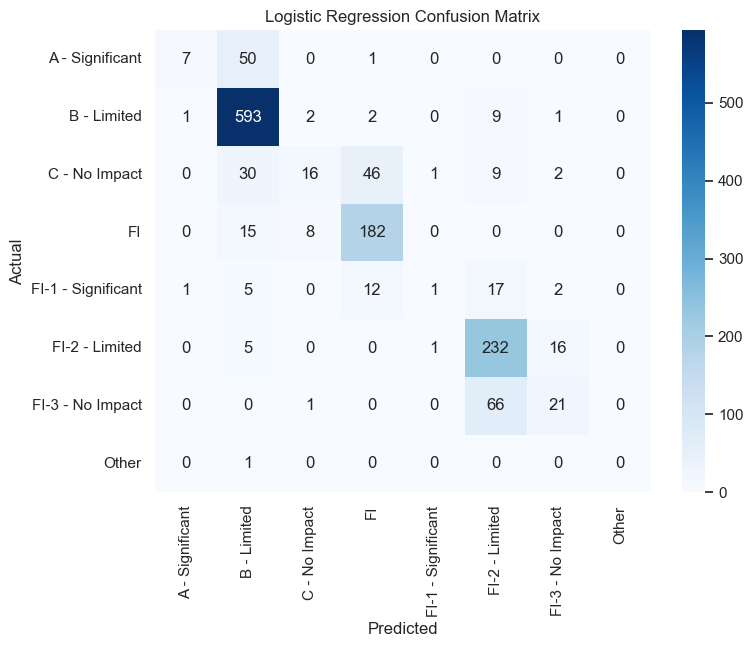

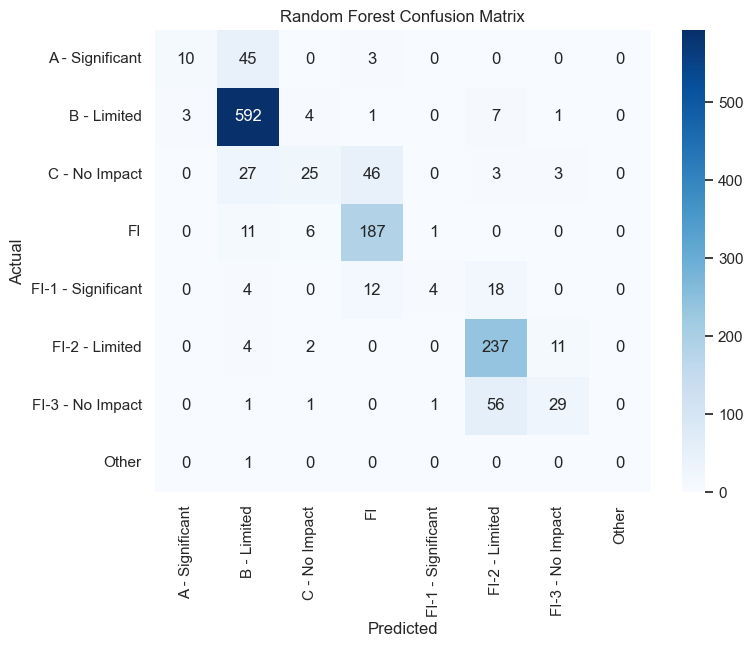

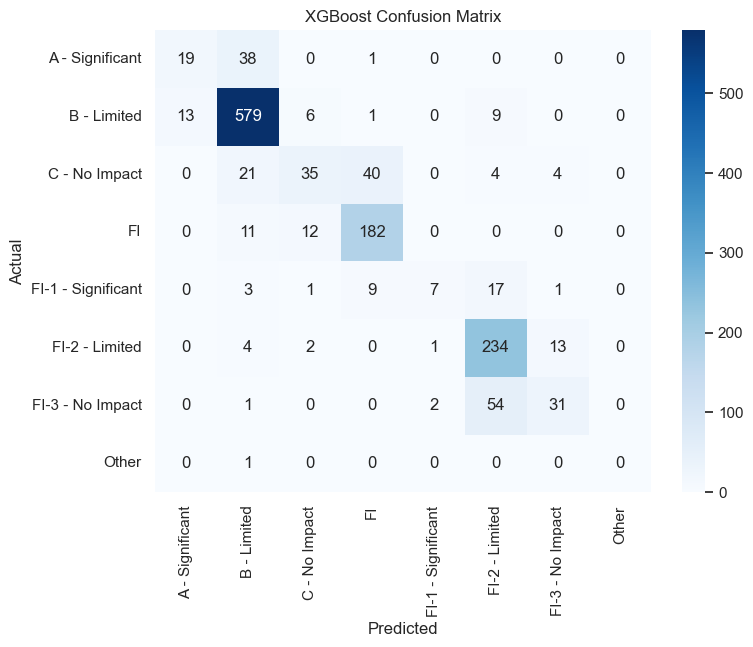

In [140]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_conf_matrix(model, X_test, y_test, title):
    preds = model.predict(X_test)
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
                xticklabels=le.classes_,
                yticklabels=le.classes_)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_conf_matrix(logreg_model, Xc_test, yc_test, "Logistic Regression Confusion Matrix")
plot_conf_matrix(rf_clf, Xc_test, yc_test, "Random Forest Confusion Matrix")
plot_conf_matrix(xgb_clf, Xc_test, yc_test, "XGBoost Confusion Matrix")


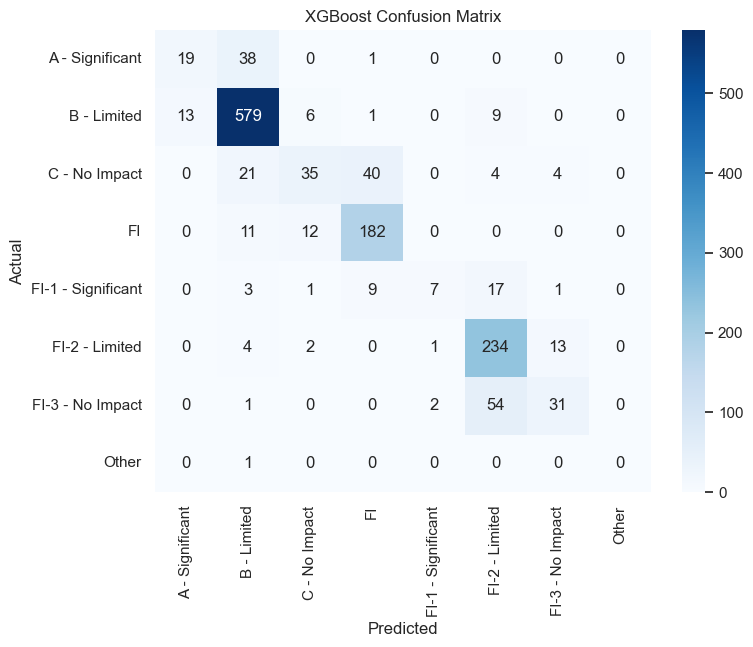

In [141]:
plot_conf_matrix(xgb_clf, Xc_test, yc_test, "XGBoost Confusion Matrix")


In [142]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yc_test, xgb_clf.predict(Xc_test))
print(cm)


[[ 19  38   0   1   0   0   0   0]
 [ 13 579   6   1   0   9   0   0]
 [  0  21  35  40   0   4   4   0]
 [  0  11  12 182   0   0   0   0]
 [  0   3   1   9   7  17   1   0]
 [  0   4   2   0   1 234  13   0]
 [  0   1   0   0   2  54  31   0]
 [  0   1   0   0   0   0   0   0]]


In [147]:
# Hyperparameter tuning


In [154]:

from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

xgb_pipe = Pipeline(steps=[
    ('preprocess', clf_preprocessor),
    ('model', XGBClassifier(
        objective='multi:softprob',
        eval_metric='mlogloss',
        tree_method='hist',     # faster, good default
        random_state=42
    ))
])


In [155]:
from scipy.stats import uniform, randint

param_distributions = {
    'model__n_estimators':    randint(200, 600),        # number of trees
    'model__max_depth':       randint(3, 9),            # tree depth
    'model__learning_rate':   uniform(0.01, 0.15),      # eta
    'model__subsample':       uniform(0.6, 0.4),        # 0.6–1.0
    'model__colsample_bytree':uniform(0.6, 0.4),        # 0.6–1.0
    'model__min_child_weight': randint(1, 6),
    'model__gamma':           uniform(0.0, 0.5)
}


In [156]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

xgb_search = RandomizedSearchCV(
    estimator=xgb_pipe,
    param_distributions=param_distributions,
    n_iter=30,                # you can increase to 50+ if you have time
    scoring='f1_weighted',
    cv=cv,
    verbose=2,
    n_jobs=-1,
    random_state=42
)


In [157]:
xgb_search.fit(Xc_train, yc_train)

print("Best F1 (cv):", xgb_search.best_score_)
print("Best params:")
for k, v in xgb_search.best_params_.items():
    print(f"  {k}: {v}")


Fitting 3 folds for each of 60 candidates, totalling 180 fits


C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


Best F1 (cv): 0.7698437872957573
Best params:
  model__colsample_bytree: 0.6673164168691722
  model__gamma: 0.10938210978653512
  model__learning_rate: 0.09371530030260117
  model__max_depth: 6
  model__min_child_weight: 1
  model__n_estimators: 517
  model__subsample: 0.9887128330883843


In [158]:
best_xgb_clf = xgb_search.best_estimator_

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_classifier(model, X_test, y_test):
    preds = model.predict(X_test)
    acc  = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, average='weighted', zero_division=0)
    rec  = recall_score(y_test, preds, average='weighted', zero_division=0)
    f1   = f1_score(y_test, preds, average='weighted', zero_division=0)
    return acc, prec, rec, f1

acc, prec, rec, f1 = evaluate_classifier(best_xgb_clf, Xc_test, yc_test)
print("Tuned XGBoost performance on test set:")
print(f"  Accuracy : {acc:.4f}")
print(f"  Precision: {prec:.4f}")
print(f"  Recall   : {rec:.4f}")
print(f"  F1-score : {f1:.4f}")


Tuned XGBoost performance on test set:
  Accuracy : 0.8016
  Precision: 0.7811
  Recall   : 0.8016
  F1-score : 0.7807


In [159]:
# Evaluate base model
base_acc, base_prec, base_rec, base_f1 = evaluate_classifier(xgb_clf, Xc_test, yc_test)

# Evaluate tuned model
tuned_acc, tuned_prec, tuned_rec, tuned_f1 = evaluate_classifier(best_xgb_clf, Xc_test, yc_test)

# Create DataFrame for comparison
comparison_df = pd.DataFrame({
    "Model": ["XGBoost (Base)", "XGBoost (Tuned)"],
    "Accuracy": [base_acc, tuned_acc],
    "Precision": [base_prec, tuned_prec],
    "Recall": [base_rec, tuned_rec],
    "F1-score": [base_f1, tuned_f1]
})

# Display table
comparison_df


,Model,Accuracy,Precision,Recall,F1-score
0,XGBoost (Base),0.801622,0.784475,0.801622,0.778181
1,XGBoost (Tuned),0.801622,0.781110,0.801622,0.780660


In [160]:
# If your base model pipeline is called xgb_clf
xgb_core = xgb_clf.named_steps['model']   # XGBClassifier inside the pipeline
booster = xgb_core.get_booster()


ImportError: You must install graphviz to plot tree

<Figure size 2000x1000 with 0 Axes>

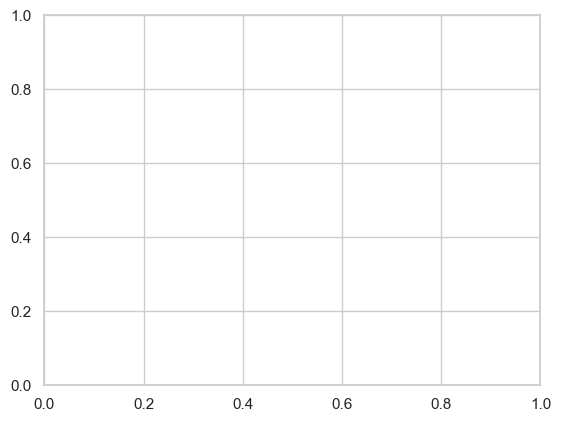

In [163]:
from xgboost import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(booster, num_trees=0, rankdir='LR')  # first tree
plt.title("XGBoost – Tree 0")
plt.show()



In [164]:
pip install graphviz


     ---------------------------------------- 47.3/47.3 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [166]:
import graphviz
graphviz.__version__



'0.21'

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

<Figure size 2000x1000 with 0 Axes>

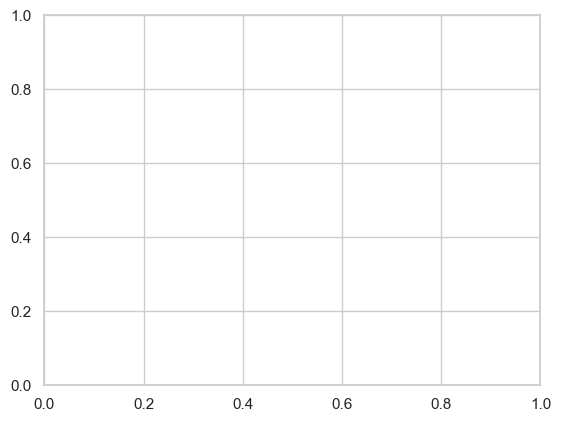

In [167]:
plt.figure(figsize=(20, 10))
plot_tree(booster, num_trees=0)
plt.show()


In [168]:
# Transform train data using the same preprocessing pipeline used in XGBoost
Xc_train_transformed = clf_preprocessor.fit_transform(Xc_train)


In [169]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=4,           # small depth → readable tree
    random_state=42
)

dt_model.fit(Xc_train_transformed, yc_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [170]:
import numpy as np

# numeric features first
numeric_names = numeric_features_clf

# one-hot-encoded categorical features
ohe = clf_preprocessor.named_transformers_['cat']
categorical_names = ohe.get_feature_names_out(categorical_features_clf)

# combined feature names
all_feature_names = np.concatenate([numeric_names, categorical_names])


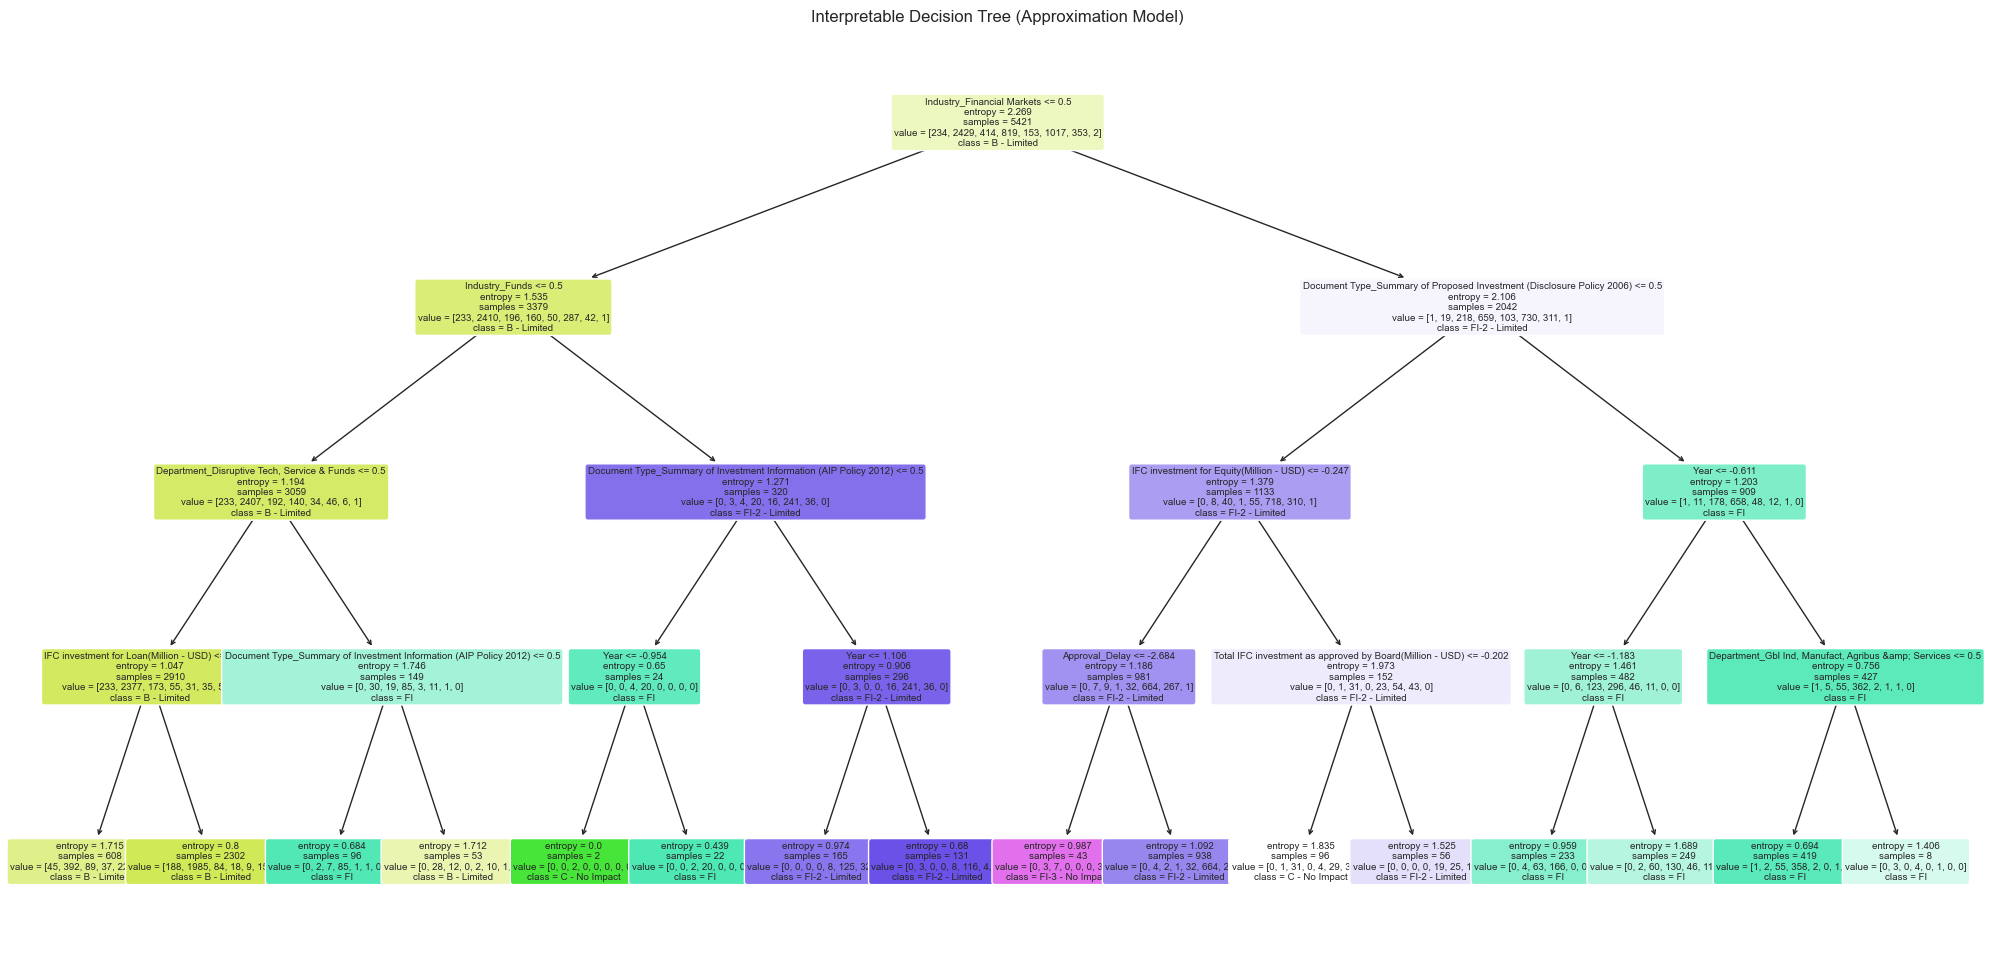

In [171]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 12))
plot_tree(
    dt_model,
    feature_names=all_feature_names,
    class_names=le.classes_,
    filled=True,
    rounded=True,
    fontsize=7
)
plt.title("Interpretable Decision Tree (Approximation Model)")
plt.show()


Total features in model: 602
Total feature names: 602


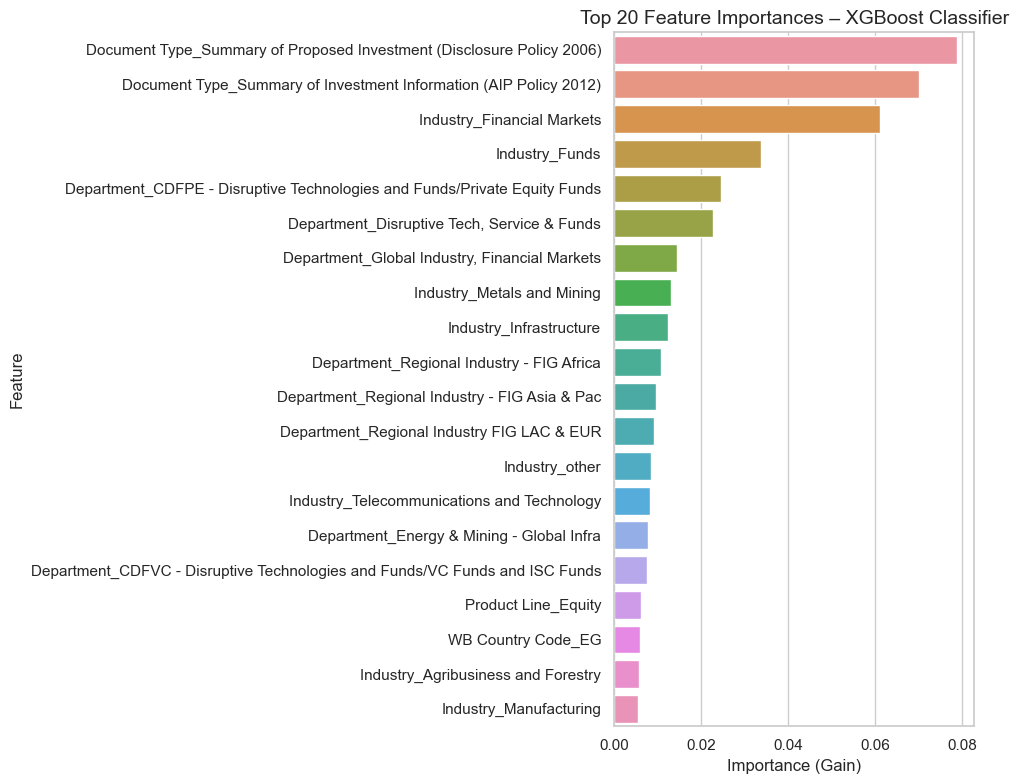

In [172]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Extract preprocessor and core XGBoost model from the pipeline
preprocess = xgb_clf.named_steps['preprocess']
xgb_core  = xgb_clf.named_steps['model']

# 2. Get feature names after preprocessing
# Numeric feature names (unchanged)
num_feature_names = np.array(numeric_features_clf)

# One-hot encoded categorical feature names
ohe = preprocess.named_transformers_['cat']
cat_feature_names = ohe.get_feature_names_out(categorical_features_clf)

# Combine into one array in the same order as the transformed matrix
all_feature_names = np.concatenate([num_feature_names, cat_feature_names])

# 3. Get feature importances from XGBoost
importances = xgb_core.feature_importances_

# Safety check
print("Total features in model:", len(importances))
print("Total feature names:", len(all_feature_names))

# 4. Take Top N most important features
N = 20
idx = np.argsort(importances)[::-1][:N]

top_importances = importances[idx]
top_features    = all_feature_names[idx]

# 5. Plot
plt.figure(figsize=(10, 8))
sns.barplot(x=top_importances, y=top_features, orient='h')
plt.title("Top 20 Feature Importances – XGBoost Classifier", fontsize=14)
plt.xlabel("Importance (Gain)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [189]:

# Deployment ready refitting

In [190]:

import joblib

df_model = df_clean.copy()

reg_target = 'Total IFC investment as approved by Board(Million - USD)'
clf_target = 'Environmental Category'

# Shared feature set for both models: drop both targets
X_features = df_model.drop(columns=[reg_target, clf_target])
y_reg = df_model[reg_target]
y_clf = df_model[clf_target]

feature_cols = X_features.columns.tolist()




In [191]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_clf_encoded = le.fit_transform(y_clf)



In [192]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_features = X_features.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_features.select_dtypes(include=['object']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ]
)



In [193]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor, XGBClassifier

X_train, X_test, y_reg_train, y_reg_test, y_clf_train, y_clf_test = train_test_split(
    X_features, y_reg, y_clf_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_clf_encoded
)

# Regression
reg_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))
])
reg_model.fit(X_train, y_reg_train)

# Classification
clf_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        eval_metric='mlogloss',
        objective='multi:softprob'
    ))
])
clf_model.fit(X_train, y_clf_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['IFC investment for '
                                                   'Loan(Million - USD)',
                                                   'IFC investment for '
                                                   'Equity(Million - USD)',
                                                   'Year', 'Approval_Delay',
                                                   'Signing_Delay',
                                                   'Invest_Delay']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Document Type',
                                                   'Product Line', 'Country',
                                                   'IFC Country Code',
                                                   'Industry', 'Department',
                                                   '...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [194]:
joblib.dump(reg_model, "reg_model.joblib")
joblib.dump(clf_model, "clf_model.joblib")
joblib.dump(le, "label_encoder.joblib")
joblib.dump(feature_cols, "feature_cols.joblib")

# Optional: save a small sample for building UI choices (categorical values)
X_features.sample(500, random_state=42).to_csv("schema_sample.csv", index=False)

